# Análise *in silico* da mutagenicidade de moléculas em formato SMILES #

## Extração de Conhecimento de Dados Biológicos - 2022/2023 ##

### Mestrado em Bioinformática ###

- Cátia Silva - PG30435
- José Lemos - PG49838
- Paulo Seixal - PG49846
- Rúben Fernandes - PG49847

### Imports e packages 

In [21]:
import sys
!{sys.executable} -m pip install rdkit 
!{sys.executable} -m pip install pandas                               
!{sys.executable} -m pip install scikit-learn                                
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
from rdkit.Chem import PandasTools
from rdkit.Chem import MACCSkeys
from rdkit.Chem.rdMolDescriptors import GetHashedAtomPairFingerprintAsBitVect
from rdkit.Chem.rdMolDescriptors import GetHashedTopologicalTorsionFingerprintAsBitVect
from base64 import b64decode
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectPercentile, f_classif
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, matthews_corrcoef, precision_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Reshape,Dropout
from keras.callbacks import ModelCheckpoint 

'c:\Users\Paulo' is not recognized as an internal or external command,
operable program or batch file.
'c:\Users\Paulo' is not recognized as an internal or external command,
operable program or batch file.


'c:\Users\Paulo' is not recognized as an internal or external command,
operable program or batch file.


# Descrição do dataset


Os métodos *in silico*, nomeadamente na área da quimioinformática, têm desempenhado papéis importantes no processo de desenvolvimento de novos fármacos. É necessário que um composto químico tenha propriedades ADMET (absorção, distribuição, metabolismo, excreção, toxicidade) perfeitas para chegar ao mercado.

A toxicologia de compostos químicos é uma das áreas de pesquisa crucial nos estudos pré-clínicos. A toxicidade é uma das principais causas de insucesso em todas as etapas do desenvolvimento de fármacos.

Atualmente, um dos ensaios mais utilizados para a avaliação da mutagenicidade de compostos é o teste de Ames. O teste de Ames é um ensaio de mutação reversa bacteriana que detecta um grande número de compostos que podem induzir danos genéticos e mutações 

Este teste envolve a exposição de bactérias à substância química em teste e posterior avaliação da taxa de mutações genéticas, em comparação com um grupo de controlo que não foi exposto à substância. Se a taxa de mutações nas bactérias expostas for significativamente maior do que no grupo de controlo, isto sugere que o produto químico é mutagénico e pode representar um risco para a saúde humana.

Os dados a serem tratados e analisados consistem em um conjunto de drogas identificadas por um ID único. Cada droga é representada por uma sequência de caracteres chamada SMILES, que representa sua composição química. Além disso, cada droga possui diversos parâmetros associados.

Os descriptores incluem valores numéricos, como peso molecular, a fração de determinados grupos químicos, solubilidade, entre outros, que descrevem as propriedades físico-químicas de uma substância e podem auxiliar na interpretação biológica.

Uma propriedade importante presente nos dados é chamada "Y", que indica se uma determinada droga possui capacidade mutagênica.

Portanto, é de grande importância a capacidade de prever se um composto químico é mutagênico. Essa previsão é relevante para áreas como segurança alimentar, indústria farmacêutica e ambiental, pois permite identificar substâncias com potencial mutagênico e adotar medidas de precaução adequadas.



## Objetivo do estudo
</p>
<div style="text-align: justify">
O objetivo principal deste trabalho é analisar um conjunto de dados de atividades de compostos químicos. Esses compostos são caracterizados por um conjunto de variáveis que representam descritores químicos calculados para cada composto, além de variáveis de metadados que representam alguma atividade ou propriedade das moléculas.</div>
</p>
</p>
<div style="text-align: justify">
Na etapa final do trabalho, o objetivo é utilizar as propriedades descritivas de uma droga para prever se ela possui capacidade mutagênica (Y=1) ou se está ausente de capacidade mutagênica (Y=0). Isso envolve a construção de um modelos preditivos.</div>
</p>
</p>
<div style="text-align: justify">
O objetivo final é utilizar esse modelos para prever a presença ou ausência de capacidade mutagênica em drogas com base nas suas características químicas descritivas, o que pode ter implicações importantes na identificação de compostos seguros e na triagem de substâncias potencialmente mutagênicas,</div>
</p>

# Importe e visualização do dataset

<div style="text-align: justify">
O dataset em análise é constituido por 7273 compostos químicos distintos, cada um deles identificado por um ID especifico.
</div>
</p>
<div style="text-align: justify">
A cada um dos compostos químicos está atribuida uma classificação (Y - variável independente) associada às suas capacidades mutagénicas. Em que a mutaeginidade é avaliada numa variável binária, tendo apenas dois valores possíveis:</div>
<ul>
<li> 0 : Não mutagénico</li>
<li> 1 : Mutagénico</li>
</ul>
</p>
<div style="text-align: justify">
Também associado a cada composto químico temos a sua representação SMILE (Simplified Molecular Input Line Entry System). A representação SMILES é um sistema de notação em usado para descrever a estrutura de compostos químicos usando sequências curtas de caracteres ASCII.</div>

In [2]:
df = pd.read_csv(r"ames.csv")
df

ids                                             smiles  Y
0        Drug 0  O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...  1
1        Drug 1       O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2  1
2        Drug 2  O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...  0
3        Drug 3                          [N-]=[N+]=CC(=O)NCC(=O)NN  1
4        Drug 4                          [N-]=[N+]=C1C=NC(=O)NC1=O  1
...         ...                                                ... ..
7268  Drug 7587                                   CCCCCCCCCCCCOCCO  0
7269  Drug 7588                             CC(CCc1ccccc1)c1ccccc1  0
7270  Drug 7593                              CCOP(=S)(CC)Sc1ccccc1  0
7271  Drug 7598                        C=C(C)C1CC=C(C)C(OC(C)=O)C1  0
7272  Drug 7602  CC/N=c1\cc2oc3cc(NCC)c(C)cc3c(-c3ccccc3C(=O)OC...  0

[7273 rows x 3 columns]

In [3]:
var = [str(x) for x in df.columns]
var

['ids', 'smiles', 'Y']

In [4]:
len(df)

7273

In [5]:
df.dtypes

ids       object
smiles    object
Y          int64
dtype: object

In [6]:
# valores NAN
for i in var:
    if df[i].isna().any():
        print("a variavel",i,"tem valores NA.")
    else:
        print("a variavel",i, "não tem valores NA.")

a variavel ids não tem valores NA.
a variavel smiles não tem valores NA.
a variavel Y não tem valores NA.


In [7]:
if df.duplicated().any():
    print("O dataset contém valores duplicados.")
else:
    print("O dataset não contém valores duplicados.")

O dataset não contém valores duplicados.


<div style="text-align: justify">
De modo a facilitar a análide do dataset , procedeu-se à conversão das SMILES strings para um objeto RDKit. O RDKit é um conjunto de ferramentas de quimioinformática responsável por funções como manipulação, análise e visualização de estruturas químicas e respetivos dados.
</div> 
</p>    
<div style="text-align: justify">    
Assim sendo, ao dataset original foi adicionada uma nova coluna ('ROMol') que irá armazenar o objecto da biblioteca de quimioinformática RDKit que representa cada molécula química.
</div>
</p>

In [8]:
#adicionar coluna com objetos rdkit
PandasTools.AddMoleculeColumnToFrame(df,'smiles')
[str(x) for x in  df.columns]

['ids', 'smiles', 'Y', 'ROMol']

In [9]:
#remover linhas com falhas no processo de geração
df = df[~df['ROMol'].isnull()]
len(df)

7273

In [10]:
df.dtypes

ids       object
smiles    object
Y          int64
ROMol     object
dtype: object

In [11]:
df.head(3)

ids                                             smiles  Y  \
0  Drug 0  O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...  1   
1  Drug 1       O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2  1   
2  Drug 2  O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...  0   

                                               ROMol  
0  <rdkit.Chem.rdchem.Mol object at 0x000001AA275...  
1  <rdkit.Chem.rdchem.Mol object at 0x000001AA275...  
2  <rdkit.Chem.rdchem.Mol object at 0x000001AA275...

c:\Users\Paulo Seixal\AppData\Local\Programs\Python\Python310\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


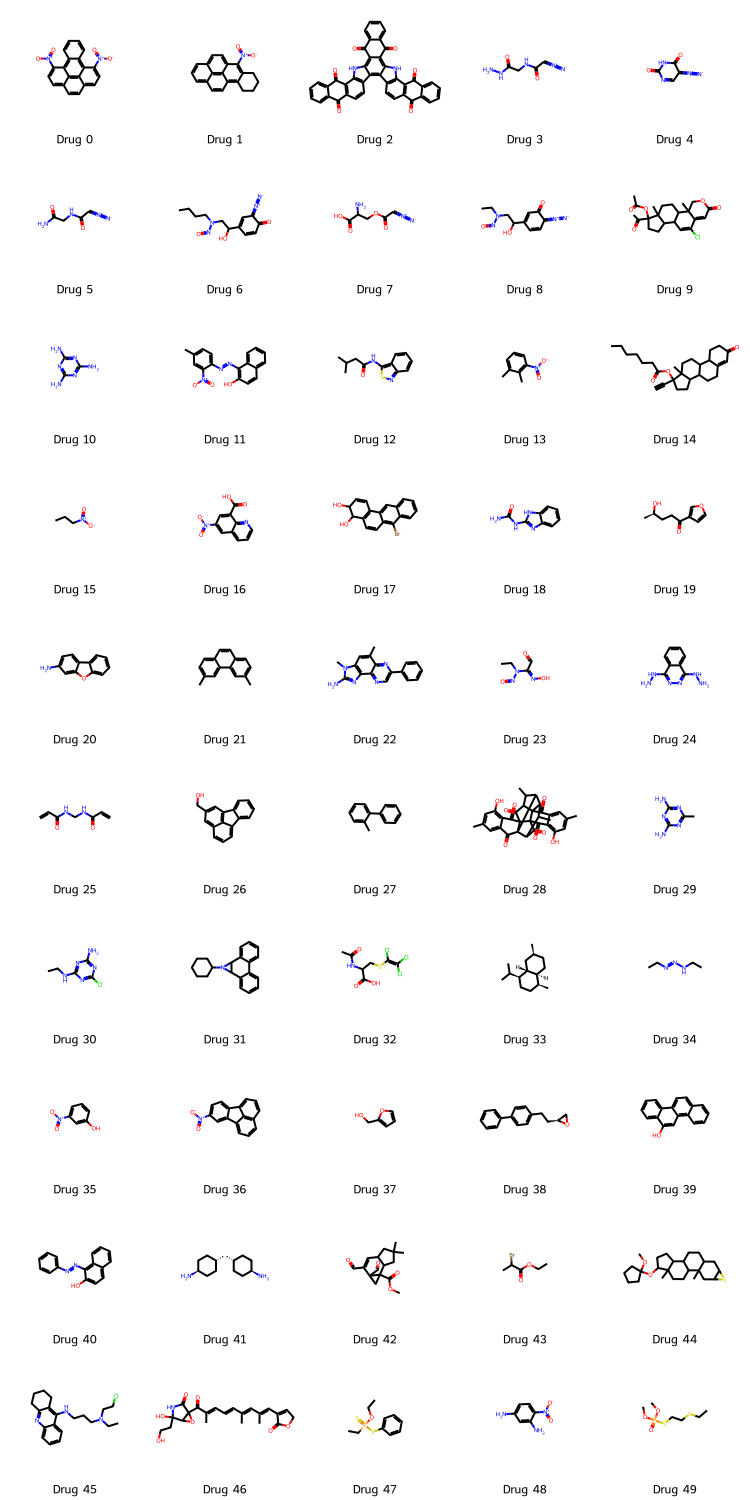

In [12]:
#representação das estruturas dos primeiros 50 compostos quimícos do dataset
PandasTools.FrameToGridImage(df,column= 'ROMol', molsPerRow=5,subImgSize=(150,150),legendsCol='ids')

# Análise e pré-processamento dos dados

## Análise da variável independente (Mutagenicidade)
</p>
<div style="text-align: justify">
O dataset utilizado possui uma distribuição equilibrada pois 54.64% das amostras apresentam características mutagénicas (3974 mutagénicas para 3299 não mutagénicas). A representação gráfica da distribuição em percentagem é vísivel no gráfico circular. 
</div>
    

In [13]:
summary_Y = df['Y'].describe()
print(summary_Y)

count    7273.000000
mean        0.546405
std         0.497876
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Y, dtype: float64


In [14]:
freq_Y = df['Y'].value_counts()
print(freq_Y)

1    3974
0    3299
Name: Y, dtype: int64


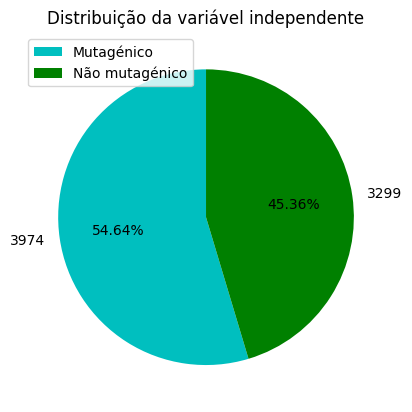

In [15]:
plt.pie(freq_Y, labels = freq_Y, colors=['c', 'g'], autopct='%1.2f%%', startangle=90)
plt.title('Distribuição da variável independente')
plt.legend(["Mutagénico","Não mutagénico"], loc='best')
plt.show()

## Análise das Features
</p>
<div style="text-align: justify">
As features fornecidas correspondem aos descritores (também conhecidos como "características" ou "atributos") em dados SMILES, que são propriedades químicas calculadas a partir da estrutura molecular representada pelo SMILES. Essas propriedades são usadas para descrever a estrutura molecular de uma substância e podem ser usadas como entradas para modelos de previsão de propriedades químicas, como a toxicidade.</div>
</p>
<div style="text-align: justify">
Existem muitos descritores diferentes que podem ser calculados a partir de uma estrutura molecular, e alguns exemplos incluem o número de átomos de carbono, hidrogênio, nitrogênio e oxigênio, o peso molecular, o número de anéis aromáticos, a polaridade e a solubilidade em água. Os descritores são calculados por meio de algoritmos que transformam a estrutura molecular em um conjunto numérico de características.</div>
</p>
<div style="text-align: justify">
Os descritores em dados SMILES são úteis para análise de dados químicos e modelagem preditiva, e podem ser usados para classificar ou prever a atividade biológica ou toxicidade de uma substância. Eles são uma ferramenta importante para o desenvolvimento de novos compostos farmacêuticos e para a avaliação de sua segurança e eficácia.</div>
</p>
<div style="text-align: justify">
No caso do dataset em análise foram fornecidos 208 descritores (exemplo:MolWT, LogP, MaxEStateIndex, etc...) que descrevem as propriedades de cada um dos 7273 compostos.
</div>

In [16]:
features = pd.read_csv(r"ames_features.csv")

In [17]:
features.shape

(7273, 208)

In [18]:
features.describe()

MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
count     7273.000000     7273.000000        7273.000000        7273.000000   
mean         9.362443       -0.451765           9.362443           0.349721   
std          3.029246        1.227820           3.029246           0.396510   
min          1.500000       -9.055860           1.500000           0.000000   
25%          6.209384       -0.846972           6.209384           0.075424   
50%         10.384028       -0.355799          10.384028           0.211296   
75%         11.488809        0.353001          11.488809           0.510718   
max         17.286264        4.111111          17.286264           4.944445   

               qed        MolWt  HeavyAtomMolWt   ExactMolWt  \
count  7273.000000  7273.000000     7273.000000  7273.000000   
mean      0.510130   242.568881      229.065451   242.196954   
std       0.167265   107.926752      102.707469   107.731070   
min       0.036666    41.053000       36.033000    41.026550   
25%       0.396894   165.148000      156.100000   165.039000   
50%       0.510491   230.270000      218.173000   230.069140   
75%       0.621552   296.319000      280.241000   296.060400   
max       0.935197   795.824000      766.923000   795.175400   

       NumValenceElectrons  NumRadicalElectrons  ...   fr_sulfide  \
count          7273.000000          7273.000000  ...  7273.000000   
mean             88.108483             0.000137  ...     0.026674   
std              39.772440             0.011726  ...     0.176611   
min              14.000000             0.000000  ...     0.000000   
25%              60.000000             0.000000  ...     0.000000   
50%              84.000000             0.000000  ...     0.000000   
75%             108.000000             0.000000  ...     0.000000   
max             314.000000             1.000000  ...     3.000000   

       fr_sulfonamd   fr_sulfone  fr_term_acetylene  fr_tetrazole  \
count   7273.000000  7273.000000        7273.000000   7273.000000   
mean       0.011275     0.003162           0.003025      0.000412   
std        0.111911     0.058548           0.054919      0.020307   
min        0.000000     0.000000           0.000000      0.000000   
25%        0.000000     0.000000           0.000000      0.000000   
50%        0.000000     0.000000           0.000000      0.000000   
75%        0.000000     0.000000           0.000000      0.000000   
max        2.000000     2.000000           1.000000      1.000000   

       fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane      fr_urea  
count  7273.000000  7273.000000    7273.00000       7273.000000  7273.000000  
mean      0.012237     0.000550       0.00825          0.270727     0.017874  
std       0.114844     0.028719       0.09345          1.539449     0.138591  
min       0.000000     0.000000       0.00000          0.000000     0.000000  
25%       0.000000     0.000000       0.00000          0.000000     0.000000  
50%       0.000000     0.000000       0.00000          0.000000     0.000000  
75%       0.000000     0.000000       0.00000          0.000000     0.000000  
max       2.000000     2.000000       2.00000         29.000000     2.000000  

[8 rows x 208 columns]

In [19]:
[str(x) for x in features.columns]

['MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_

</p>
<div style="text-align: justify">
A seleção de features pode ser particularmente importante devido à elevada dimensionalide dos dados. O conjunto dos dados original conta com 7273 compostos químicos, cada um descrito por 208 descritores.</div>
</p>
<div style="text-align: justify">
Posto isto, algumas dessas features podem ser irrelevantes ou redundantes para prever a mutagenicidade, e incluí-las só aumentaria a complexidade computacional sem melhorar a precisão.</div>
</p>
<div style="text-align: justify">
Assim sendo, foram usados métodos de seleção de features do sklearn, para identificar as que serão mais informativas e relevantes para prever a mutagenicidade no dataset.</div>
<p>
<div style="text-align: justify">
Desta forma, decidiu-se efetuar uma seleção do percentil 5 às features com melhor performance tendo como base o score obtido pelo teste ANOVA, aplicado através do método <pre><code>SelectPercentile(f_classif, percentile=5)</pre></code>
</div>

In [20]:
# separar features e labels(y)
X = features
y = df['Y']

# SelectPercentile
selector = SelectPercentile(f_classif, percentile=5)  
X_new = selector.fit_transform(X, y)

# print features selecionadas
print(X.columns[selector.get_support()])

Index(['HallKierAlpha', 'SMR_VSA5', 'SlogP_VSA5', 'SlogP_VSA8', 'VSA_EState8',
       'NumAromaticCarbocycles', 'NumAromaticRings', 'RingCount', 'fr_benzene',
       'fr_nitro', 'fr_nitro_arom_nonortho'],
      dtype='object')


c:\Users\Paulo Seixal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 67  80 195] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Paulo Seixal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [22]:
top10_y = pd.concat([df['Y'], features['HallKierAlpha'], features['SMR_VSA5'], features['SlogP_VSA5'], features['SlogP_VSA8'], features['VSA_EState8'],
       features['NumAromaticCarbocycles'], features['NumAromaticRings'], features['RingCount'], features['fr_benzene'],
       features['fr_nitro'], features['fr_nitro_arom_nonortho']], axis=1)
top10_y


Y  HallKierAlpha   SMR_VSA5  SlogP_VSA5  SlogP_VSA8  VSA_EState8  \
0     1          -3.80   0.000000    0.000000   43.089794     0.000000   
1     1          -2.68  25.683287   23.968546   32.317345     0.000000   
2     0          -7.06   0.000000    0.000000  108.246390     0.000000   
3     1          -1.72   0.000000    0.000000    5.531129    -0.248657   
4     1          -1.81   0.000000    0.000000    5.531129     0.000000   
...  ..            ...        ...         ...         ...          ...   
7268  0          -0.08  71.131950   71.131950    0.000000     3.727293   
7269  0          -1.56  25.683287   30.389368    0.000000     2.303843   
7270  0           0.18  18.742958   13.847474    0.000000     4.819040   
7271  0          -1.05  39.716820   33.612854    0.000000     9.451552   
7272  0          -3.60  27.694948   35.332367   33.419846     9.725529   

      NumAromaticCarbocycles  NumAromaticRings  RingCount  fr_benzene  \
0                        5.0               5.0        5.0         5.0   
1                        4.0               4.0        5.0         4.0   
2                        9.0              11.0       11.0         9.0   
3                        0.0               0.0        0.0         0.0   
4                        0.0               0.0        1.0         0.0   
...                      ...               ...        ...         ...   
7268                     0.0               0.0        0.0         0.0   
7269                     2.0               2.0        2.0         2.0   
7270                     1.0               1.0        1.0         1.0   
7271                     0.0               0.0        1.0         0.0   
7272                     2.0               2.0        4.0         3.0   

      fr_nitro  fr_nitro_arom_nonortho  
0          2.0                     2.0  
1          1.0                     0.0  
2          0.0                     0.0  
3          0.0                     0.0  
4          0.0                     0.0  
...        ...                     ...  
7268       0.0                     0.0  
7269       0.0                     0.0  
7270       0.0                     0.0  
7271       0.0                     0.0  
7272       0.0                     0.0  

[7273 rows x 12 columns]

</p>
<div style="text-align: justify">
O objetivo da análise é comparar as distribuições entre diferentes variáveis que  possuem escalas diferentes. De modo a proceder à análise dos dados dos descriptores, recorreu-se á normalização dos dados de modo a facilitar a sua análise estatistica. 
</div>
<p>

In [23]:
#normalização dos dados

# lista com colunas a normalizar
cols_to_scale = [col for col in top10_y.columns if col != 'Y']

# criar novo df só com essas colunas
df_to_scale = top10_y[cols_to_scale]

# normalizar
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_to_scale)

# converter para dataframe
df_scaled = pd.DataFrame(scaled_data, columns=cols_to_scale)

# concatenar com a coluna da variável independente
top10_y_scaled = pd.concat([df['Y'], df_scaled], axis=1)
top10_y_scaled

Y  HallKierAlpha  SMR_VSA5  SlogP_VSA5  SlogP_VSA8  VSA_EState8  \
0     1      -1.932381 -0.742669   -0.780329    3.014031    -0.683103   
1     1      -0.952377  0.385801    0.336479    2.100532    -0.683103   
2     0      -4.784895 -0.742669   -0.780329    8.539277    -0.683103   
3     1      -0.112373 -0.742669   -0.780329   -0.170926    -0.766481   
4     1      -0.191123 -0.742669   -0.780329   -0.170926    -0.683103   
...  ..            ...       ...         ...         ...          ...   
7268  0       1.322634  2.382718    2.534045   -0.639963     0.566711   
7269  0       0.027628  0.385801    0.635655   -0.639963     0.089408   
7270  0       1.550135  0.080857   -0.135110   -0.639963     0.932789   
7271  0       0.473880  1.002404    0.785853   -0.639963     2.486134   
7272  0      -1.757381  0.474189    0.865973    2.194024     2.578003   

      NumAromaticCarbocycles  NumAromaticRings  RingCount  fr_benzene  \
0                   3.015790          2.579185   1.807559    3.014997   
1                   2.217586          1.839617   1.807559    2.217003   
2                   6.208604          7.016595   5.528584    6.206973   
3                  -0.975229         -1.118657  -1.293294   -0.974972   
4                  -0.975229         -1.118657  -0.673124   -0.974972   
...                      ...               ...        ...         ...   
7268               -0.975229         -1.118657  -1.293294   -0.974972   
7269                0.621179          0.360480  -0.052953    0.621015   
7270               -0.177025         -0.379089  -0.673124   -0.176978   
7271               -0.975229         -1.118657  -0.673124   -0.974972   
7272                0.621179          0.360480   1.187389    1.419009   

      fr_nitro  fr_nitro_arom_nonortho  
0     3.754588                5.520171  
1     1.694140               -0.276566  
2    -0.366308               -0.276566  
3    -0.366308               -0.276566  
4    -0.366308               -0.276566  
...        ...                     ...  
7268 -0.366308               -0.276566  
7269 -0.366308               -0.276566  
7270 -0.366308               -0.276566  
7271 -0.366308               -0.276566  
7272 -0.366308               -0.276566  

[7273 rows x 12 columns]

<div style="text-align: justify">
Através do método <i>SelecPercentile</i> do <i>sklearn</i> foram selecionadas as seguintes features:
<ul>    
<li> <b>HallKierAlpha</b>: representa a densidade de eletrões em cada átomo de uma molécula. É usado para prever a reatividade química e a estabilidade de compostos. </li>
<li> <b>SMR_VSA5</b>: mede a área superficial molecular relativa (SMR) de uma molécula em torno de um átomo específico. É usado para prever a solubilidade e a atividade biológica de compostos.</li>
<li> <b>SlogP_VSA5</b>: mede a contribuição de cada grupo de átomos de uma molécula para a partição octanol-água (logP). É usado para prever a solubilidade e a permeabilidade do composto através de membranas biológicas.</li>
<li> <b>SlogP_VSA8</b>: semelhante ao SlogP_VSA5, mas calculado para uma raio de 8 Å à volta de um átomo específico.</li>
<li> <b>VSA_EState8</b>: mede a carga eletrostática da molécula em torno de um átomo específico. É usado para prever a atividade biológica de compostos.</li>
<li> <b>NumAromaticCarbocycles</b>: conta o número de ciclos aromáticos numa molécula, que contêm apenas átomos de carbono. É usado para identificar compostos com propriedades aromáticas.</li>
<li> <b>NumAromaticRings</b>: semelhante ao NumAromaticCarbocycles, mas que conta o número total de anéis aromáticos de uma molécula, e não só os que contêm apenas átomos de carbono.</li>
<li> <b>RingCount</b>: conta o número total de anéis de uma molécula, independentemente de serem aromáticos ou não.</li>
<li> <b>fr_benzene</b>: conta o número de anéis de benzeno de uma molécula.</li>
<li> <b>fr_nitro</b>: conta o número de grupos NO2 de uma molécula.</li>
<li> <b>fr_nitro_arom_nonortho</b> conta o número de grupos nitro em anéis aromáticos que não estão na posição <em>orto</em> .</li>
</ul>
</div>

</p>
<div style="text-align: justify">Recorrendo à bibliografia é possivel verificar que algumas das features mencionadas, estão relacionadas com a mutagenicidade [1-4]. No entanto, é importante ressaltar que a relação entre as features e a mutagenicidade pode variar dependendo do contexto e do conjunto de dados específico. Aqui estão algumas features que podem ter uma relação com a mutagenicidade:</div>
</p>
<div style="text-align: justify">
HallKierAlpha: A densidade dos eetrões em cada átomo de uma molécula pode estar relacionada com a reatividade química e a estabilidade dos compostos. Certas características da densidade eletrônica podem influenciar a capacidade de um composto de causar mutações no material genético.</div>
</p>
<div style="text-align: justify">
SMR_VSA5: A área superficial molecular relativa (SMR) está relacionada com a solubilidade e a atividade biológica de compostos. A solubilidade pode afetar a absorção e a distribuição de um composto no organismo, o que pode ser relevante para a sua mutagenicidade.</div>
</p>
<div style="text-align: justify">
SlogP_VSA5 e SlogP_VSA8: As features mencionadas medem a contribuição de diferentes grupos de átomos para a partição octanol-água (logP) e podem estar relacionadas com a solubilidade e a permeabilidade do composto. Novamente, essas propriedades podem influenciar a interação de um composto com o material genético.</div>
</p>
<div style="text-align: justify">
VSA_EState8: A carga eletrostática da molécula em torno de um átomo específico pode estar relacionada com a atividade biológica de compostos. Certas cargas eletrostáticas podem interagir com o material genético e potencialmente causar mutações.</div>
</p>
<div style="text-align: justify">
NumAromaticCarbocycles, NumAromaticRings, RingCount, fr_benzene, fr_nitro e fr_nitro_arom_nonortho: Essas features estão relacionadas com a presença de anéis aromáticos e grupos funcionais específicos nas moléculas. Alguns grupos químicos, como anéis de benzeno e grupos nitro, podem estar associados a propriedades mutagênicas.</div>

</p>
<div style="text-align: justify">
Após a seleção das *features* foi necessário o processamento e posterior análise das mesmas.</div>

In [24]:
top10_y.describe()

Y  HallKierAlpha     SMR_VSA5   SlogP_VSA5   SlogP_VSA8  \
count  7273.000000    7273.000000  7273.000000  7273.000000  7273.000000   
mean      0.546405      -1.591574    16.902695    16.747155     7.546773   
std       0.497876       1.142930    22.760971    21.463131    11.793333   
min       0.000000      -7.400000    -0.061902     0.000000     0.000000   
25%       0.000000      -2.360000     0.000000     0.000000     0.000000   
50%       1.000000      -1.630000    10.937325    11.126903     0.000000   
75%       1.000000      -0.830000    24.539800    23.334835    11.126903   
max       1.000000       3.480000   232.155410   232.155410   108.246390   

       VSA_EState8  NumAromaticCarbocycles  NumAromaticRings    RingCount  \
count  7273.000000             7273.000000       7273.000000  7273.000000   
mean      2.037204                1.221779          1.512581     2.085384   
std       2.982485                1.252899          1.352233     1.612570   
min      -4.128889                0.000000          0.000000     0.000000   
25%       0.000000                0.000000          0.000000     1.000000   
50%       0.904612                1.000000          1.000000     2.000000   
75%       3.203314                2.000000          2.000000     3.000000   
max      28.341402                9.000000         11.000000    11.000000   

        fr_benzene     fr_nitro  fr_nitro_arom_nonortho  
count  7273.000000  7273.000000             7273.000000  
mean      1.221779     0.177781                0.095421  
std       1.253229     0.485365                0.345045  
min       0.000000     0.000000                0.000000  
25%       0.000000     0.000000                0.000000  
50%       1.000000     0.000000                0.000000  
75%       2.000000     0.000000                0.000000  
max       9.000000     6.000000                4.000000

In [25]:
# verificar valores NA do top10 das features

for col in top10_y_scaled.columns:
    if top10_y_scaled[col].isna().sum() > 0:
        print(f" A variável'{col}' tem {top10_y_scaled[col].isna().sum()} valores NA\n")
    else:
        print(f"A variável '{col}' não tem valores NA\n")

A variável 'Y' não tem valores NA

A variável 'HallKierAlpha' não tem valores NA

A variável 'SMR_VSA5' não tem valores NA

A variável 'SlogP_VSA5' não tem valores NA

A variável 'SlogP_VSA8' não tem valores NA

A variável 'VSA_EState8' não tem valores NA

A variável 'NumAromaticCarbocycles' não tem valores NA

A variável 'NumAromaticRings' não tem valores NA

A variável 'RingCount' não tem valores NA

A variável 'fr_benzene' não tem valores NA

A variável 'fr_nitro' não tem valores NA

A variável 'fr_nitro_arom_nonortho' não tem valores NA



<div style="text-align: justify">
Depois de se verificar que nenhuma das <em>features</em> selecionadas apresenta valores NA, procedeu-se à realização de alguns testes estatísticos de forma a estabelecer uma comparação entre os compostos mutagénicos e não mutagénicos. Os testes foram realizados para um <em>alpha</em> de 0.05
</div>

In [26]:
print('***TESTES À NORMALIDADE***\n')
for i in top10_y_scaled.columns:
# Shapiro-Wilk test
    stat, p = stats.shapiro(top10_y_scaled[i])
    print(f'Teste à normalidade da variável "{i}":\nStatistics=%.3f, p-value=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print(f'"{i}", não assume uma distribuição normal (falha em rejeitar H0)\n')
    else:
        print(f'"{i}", assume uma distribuição normal (rejeita H0)\n')
print("\n")

print('--------------------------------------------------------------------------------------------\n')

significant = dict()

print('***T-TEST***\n')
for i in top10_y_scaled.columns:
    print(i, 'vs Mutagenicity')

# perform a Mann-Whitney U test
    stat, p = stats.ttest_ind(top10_y_scaled[i][top10_y_scaled['Y'] == 0], top10_y_scaled[i][top10_y_scaled['Y'] == 1])
    print('T-test:\nStatistics=%.3f, p-value=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Não há uma diferença significativa entre as duas variáveis (falha em rejeitar H0)\n')
    else:
        print('Há uma diferença significativa entre as duas variáveis (rejeita H0)\n')


print("\n") 


***TESTES À NORMALIDADE***

Teste à normalidade da variável "Y":
Statistics=0.634, p-value=0.000
"Y", assume uma distribuição normal (rejeita H0)

Teste à normalidade da variável "HallKierAlpha":
Statistics=0.992, p-value=0.000
"HallKierAlpha", assume uma distribuição normal (rejeita H0)

Teste à normalidade da variável "SMR_VSA5":
Statistics=0.715, p-value=0.000
"SMR_VSA5", assume uma distribuição normal (rejeita H0)

Teste à normalidade da variável "SlogP_VSA5":
Statistics=0.733, p-value=0.000
"SlogP_VSA5", assume uma distribuição normal (rejeita H0)

Teste à normalidade da variável "SlogP_VSA8":
Statistics=0.692, p-value=0.000
"SlogP_VSA8", assume uma distribuição normal (rejeita H0)

Teste à normalidade da variável "VSA_EState8":
Statistics=0.755, p-value=0.000
"VSA_EState8", assume uma distribuição normal (rejeita H0)

Teste à normalidade da variável "NumAromaticCarbocycles":
Statistics=0.843, p-value=0.000
"NumAromaticCarbocycles", assume uma distribuição normal (rejeita H0)

Tes

<div style="text-align: justify">
Nos testes estatísticos realizados verificou-se que todas as <em>features</em> seguem uma distribuição normal, o que seria esperado uma vez que são dados resultantes da normalização. Verificou-se também que, após realização do t-test, todas as <em>features</em> apresentam uma diferença significativa nos seus valores, ao comparar compostos mutagénicos e não mutagénicos.</div>
</p>
<div style="text-align: justify">
Estes resultados permitem-nos concluir que todas estas features poderão servir de base para explicar e prever a mutagenicidade entre compostos.</div>

</p>
<div style="text-align: justify">
Depois dos testes estatísticos, foram também construidos gráficos de apoio à análise dos resultados anteriores. Neste caso foram construidos boxplots para cada <i>feature</i>, onde serão comparadas as suas ditribuições de valores entre compostos mutagénicos e não mutagénicos.</div>

HallKierAlpha vs Mutagenicidade


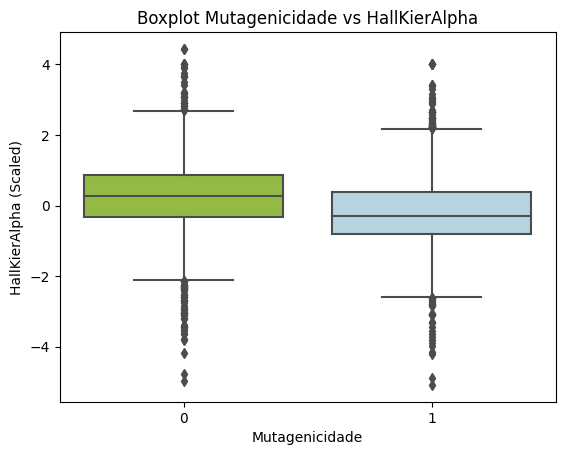

SMR_VSA5 vs Mutagenicidade


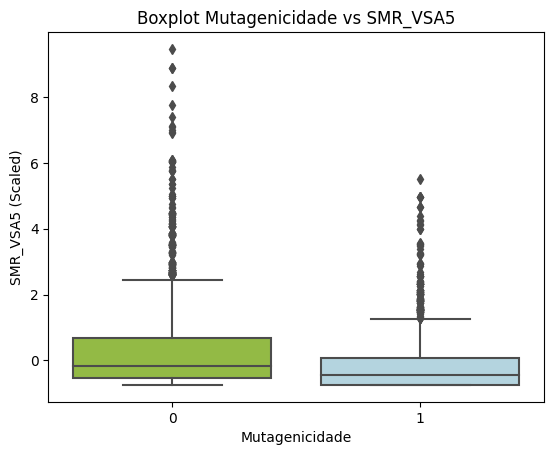

SlogP_VSA5 vs Mutagenicidade


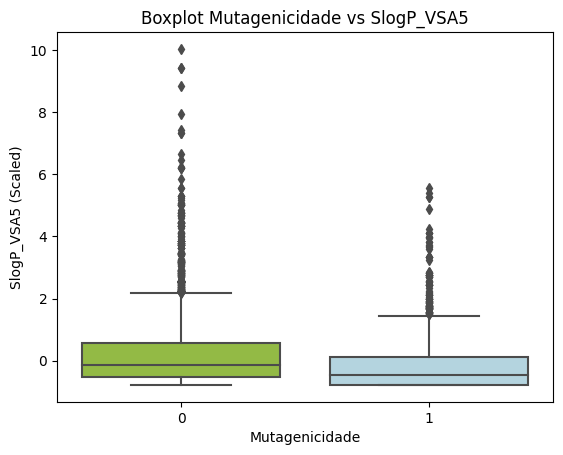

SlogP_VSA8 vs Mutagenicidade


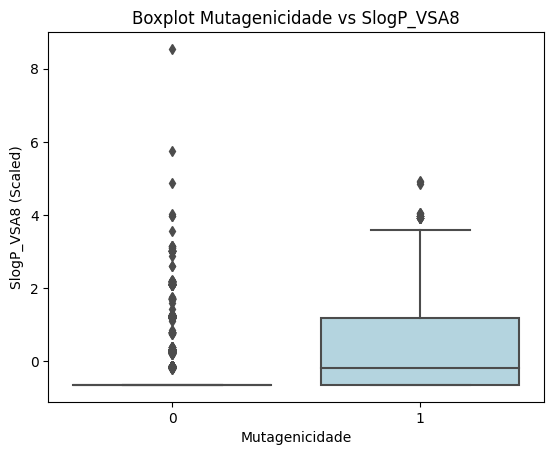

VSA_EState8 vs Mutagenicidade


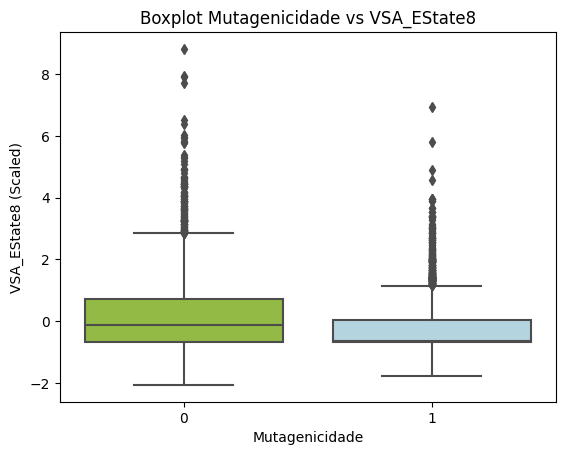

NumAromaticCarbocycles vs Mutagenicidade


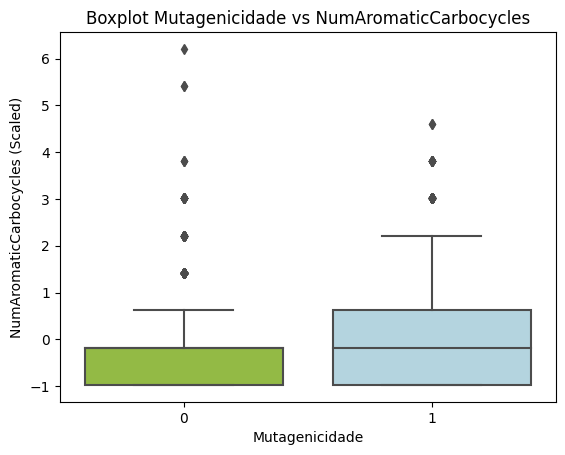

NumAromaticRings vs Mutagenicidade


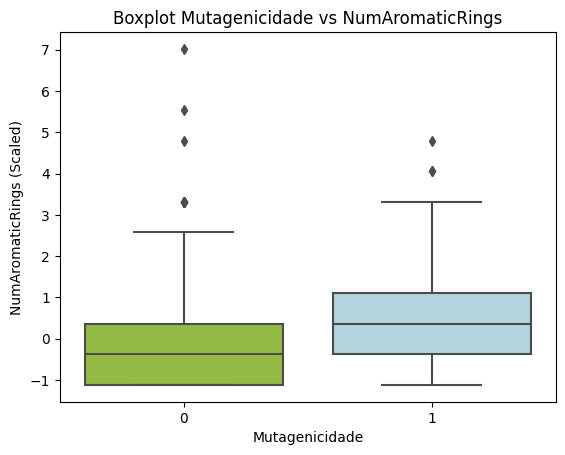

RingCount vs Mutagenicidade


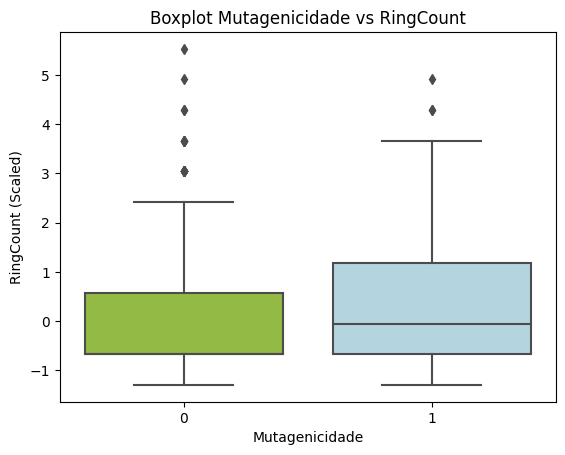

fr_benzene vs Mutagenicidade


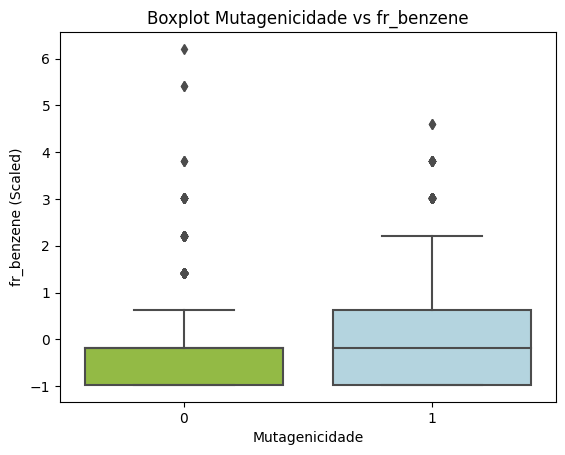

fr_nitro vs Mutagenicidade


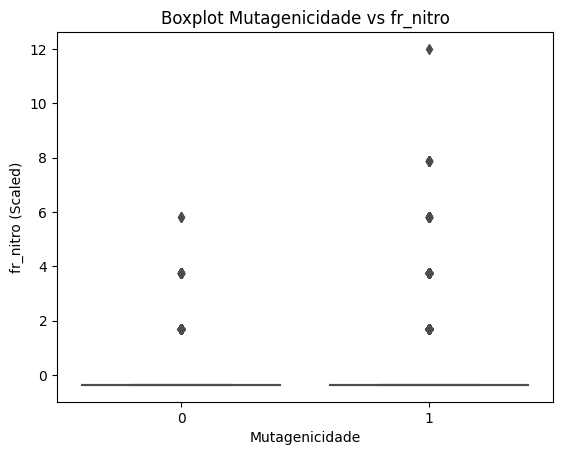

fr_nitro_arom_nonortho vs Mutagenicidade


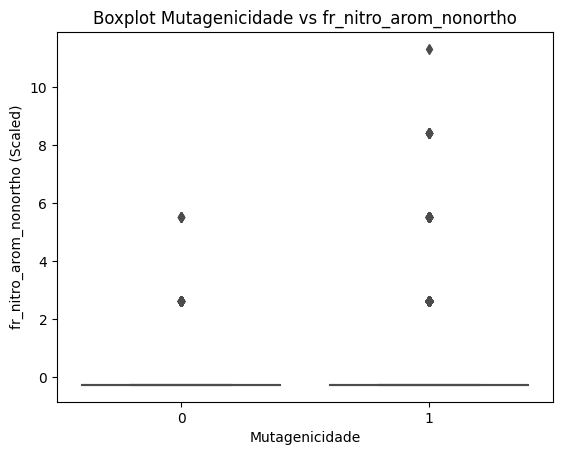

In [27]:
my_palette = ["#9ACD32", "#ADD8E6"]
for i in top10_y_scaled.columns:
    if i != 'Y':
        print(i, 'vs Mutagenicidade')
    # create the boxplot
        sns.boxplot(x='Y', y=i, data=top10_y_scaled,palette=my_palette)

    # add title and labels
        plt.title('Boxplot Mutagenicidade vs ' + i)
        plt.xlabel('Mutagenicidade')
        plt.ylabel(f'{i} (Scaled)')

    # display the plot
        plt.show()


</p>
<div style="text-align: justify">
Os resultados apresentados corroboram as conclusões já retiradas dos testes esttísticos anteriores. Há uma diferença na distribuição de valores de cada <i>feature</i> entre compostos mutagénicos e não mutagénicos.</div>
</p>
<div style="text-align: justify">
No entanto, há algumas dúvidas quanto às <i>features</i>,  <b>fr_nitro</b> e <b>fr_nitro_arom_nonortho</b>, onde os boxplots aparentam ter apenas outliers.</div> 

</p>
<div style="text-align: justify">
Uma etapa importante na análise das <i>features</i> é o estudo da correlação entre as mesmas. Estabelecer correlações entre <i>features</i> torna-se importante pois permite identificar padrões e relações entre os dados, que ajudam à interpretação do significado biológico destas mesmas <i>features</i>. </div>
</p>
<div style="text-align: justify">
Deste modo, a correlação entre variáveis pode fornecer insights sobre a redundância ou sobreposição de informações entre elas. Quando duas variáveis têm uma correlação alta (próxima de 1 ou -1), significa que elas estão altamente relacionadas e podem fornecer informações semelhantes. Nesses casos, uma das variáveis pode ser considerada redundante, pois não adiciona informações adicionais significativas.
</div>

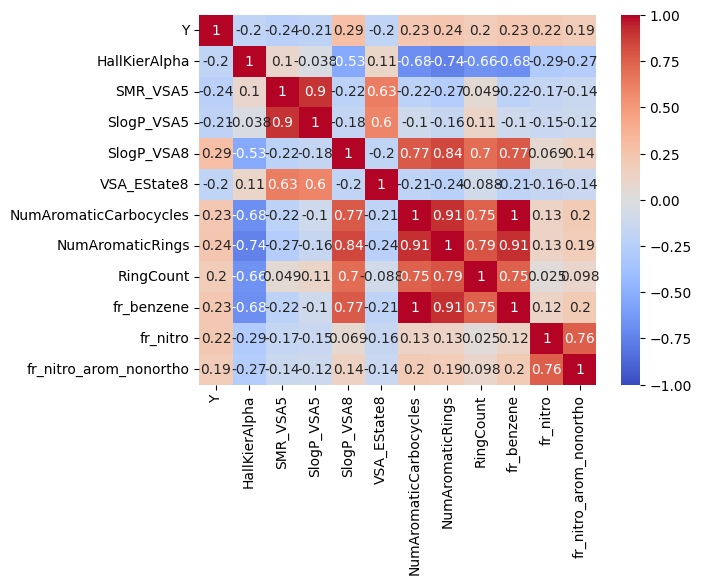

In [28]:
# criar matriz de correlação
features_corr = top10_y_scaled.corr()

# criação do heatmap
sns.heatmap(features_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

# plot
plt.show()

</p>
<div style="text-align: justify">
Os resultados do heatmap de correlações apresentam uma clara correlação positiva entre os grupo de features <b>NumAromaticCarbocycles</b>; <b>NumAromaticRings</b>; <b>RingCount</b>; <b>fr_benzene</b>; e <b>SlogP_VSA8</b>, com valores de correlação entre 0.75 e 1.</div> 
</p>
<div style="text-align: justify">
Tratando-se de <i>features</i> relacionadas com o número e tipo de anéis que compõem a estrutura da molécula, faz todo o sentido que se verifique uma correlação positiva. Deste modo, optou-se por utlizar apenas a variavel <b>NumAromaticCarbocycles</b> e excluir as variáveis redundantes ('fr_benzene', 'NumAromaticCarbocycles'e 'SlogP_VSA8') . </div>
</p>
<div style="text-align: justify">
Relativamente à variável independente (mutagenicidade), embora não exista nenhuma correlação óbvia, existem algumas features com correlação positiva moderada. São elas: <b>SlogP_VSA8</b>; <b>NumAromaticCarbocycles</b>; <b>NumAromaticRings</b>; <b>RingCount</b>; <b>fr_benzene</b>; <b>fr_nitro</b> e <b>fr_nitro_arom_northo</b>.</div>

### Redução da dimensionalidade
#### Análise de Componentes Principais (PCA) 
</p>
<div style="text-align: justify">
Após a seleção das features, procedeu-se à redução de dimensionalidade do dataframe resultante ("df_scaled"), de modo a obter um conjunto menor e independente de variáveis chamadas de componentes principais. </div>
</p>
<div style="text-align: justify">
O PCA foi realizado para uma redução de até três PCs que explicam 83% da variância dos dados.
Os dados obtidos podem ser visualizados no gráfico bidimensional que utiliza os dois componentes principais como eixo.</div>



Var. explicada: [0.46404387 0.22072711 0.14853124]
Soma: 83.33022189848212 %
[[46.40438693  0.          0.        ]
 [ 0.         22.07271098  0.        ]
 [ 0.          0.         14.85312399]]


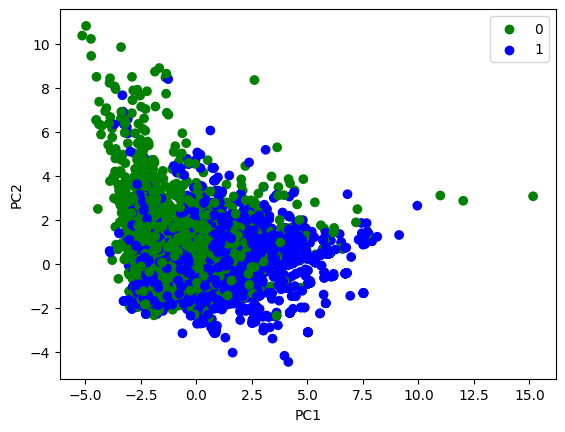

In [29]:
# PCA (df_scaled apresenta apenas as features selecionadas num dos tópicos anteriores, já normalizadas)
pca = PCA(n_components=3)
pca.fit(df_scaled)

# determinar var
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
print('Var. explicada: %s'% str(pca.explained_variance_ratio_))
print('Soma:', sum(pca.explained_variance_ratio_) * 100, '%')


#obter as percentagens de variabilidade explicadas por cada PC
varia_exp = pca.explained_variance_ratio_
matriz_var_exp = np.diag(varia_exp*100)
print(matriz_var_exp)

# três primeiros PCs
pca_scores = pca.transform(df_scaled)[:, :3]

# mapa de cores para o plot
data_colors = {0: 'green', 1: 'blue'}
colors = [data_colors[t] for t in df['Y']]

# plot
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], c=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')

# legenda
handles = []
labels = []
for data_type, color in data_colors.items():
    handles.append(plt.scatter([], [], c=color))
    labels.append(data_type)
plt.legend(handles, labels, loc='upper right')

No gráfico PCA, podemos observar que não há uma clara separação dos compostos, tendo em conta a sua mutagenicidade, indicando que a partir dos dados inseridos, não existem diferenças claras que permitam distinguir os compostos. 

Ainda assim optou-se ainda por fazer uma visualização dos mesmos dados, desta vez a partir de 3 componentes, de onde se podem tirar as mesmas conclusões.

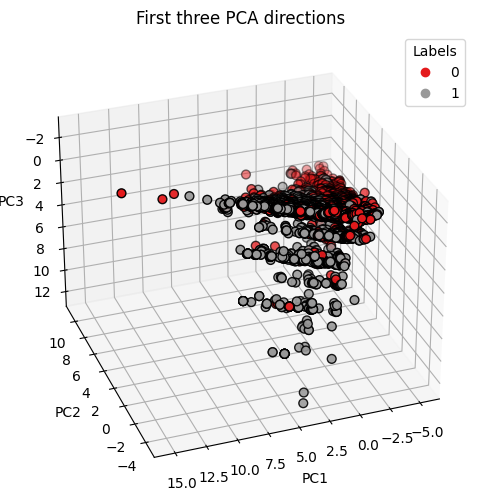

In [30]:
fig = plt.figure(1, figsize=(8, 6))

ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

scatter = ax.scatter(
    pca_scores[:, 0],
    pca_scores[:, 1],
    pca_scores[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")


legend = ax.legend(*scatter.legend_elements(), title="Labels")


plt.show()


Cada linha na matriz ```pca.components_``` representa um componente principal, e cada coluna representa uma *feature*. O valor em cada posição representa o peso da *feature* no componente principal correspondente.

Para ter uma ideia de quais serão *features* mais associadas a cada PC, examinaram-se os valores dos pesos das *features* em cada linha. As *features* com os valores absolutos mais altos numa determinada linha são aquelas que contribuem mais para esse componente principal. Neste caso, serão as *features*: **NumAromaticRings**, **SlogP_VSA5**, e **fr_nitro**

In [31]:
# nomes das features
feature_names = list(df_scaled.columns.values)


for i, pc in enumerate(pca.components_):
    print(f"Principal component {i+1}:")
    
    # obter pesos das features
    pc_weights = dict(zip(feature_names, pc))
    
    # ordenar features pelo peso
    pc_weights_sorted = sorted(pc_weights.items(), key=lambda x: abs(x[1]), reverse=True)
    
    # top 5 features
    for j in range(5):
        feature, weight = pc_weights_sorted[j]
        print(f"\t{feature}: {weight:.3f}")
    
    print()


Principal component 1:
	NumAromaticRings: 0.425
	NumAromaticCarbocycles: 0.416
	fr_benzene: 0.416
	SlogP_VSA8: 0.374
	RingCount: 0.355

Principal component 2:
	SlogP_VSA5: 0.566
	SMR_VSA5: 0.548
	VSA_EState8: 0.449
	RingCount: 0.243
	fr_nitro: -0.212

Principal component 3:
	fr_nitro: 0.659
	fr_nitro_arom_nonortho: 0.648
	SlogP_VSA5: 0.190
	SMR_VSA5: 0.183
	HallKierAlpha: -0.156



####  Clustering (Distância de Manhattan)
</p>
<div style="text-align: justify">
Tendo em conta o elevado número de compostos químicos em análise, é necessário agrupá-los com base em suas características ou atributos comuns. 

Tratando-se de um dataset com milhares de compostos, o uso de clustering hierarquico poderá não ser a melhor opção, uma vez que se torna demasiado pesado computacionalmente e será dificl conseguir fazer algum tipo de interpretação de resultados, dada a elevada dimensão do dataset. 

O dendograma abaixo apresentado torna-se, então, demasiado denso para retirar alguma conslusão. 
</div>

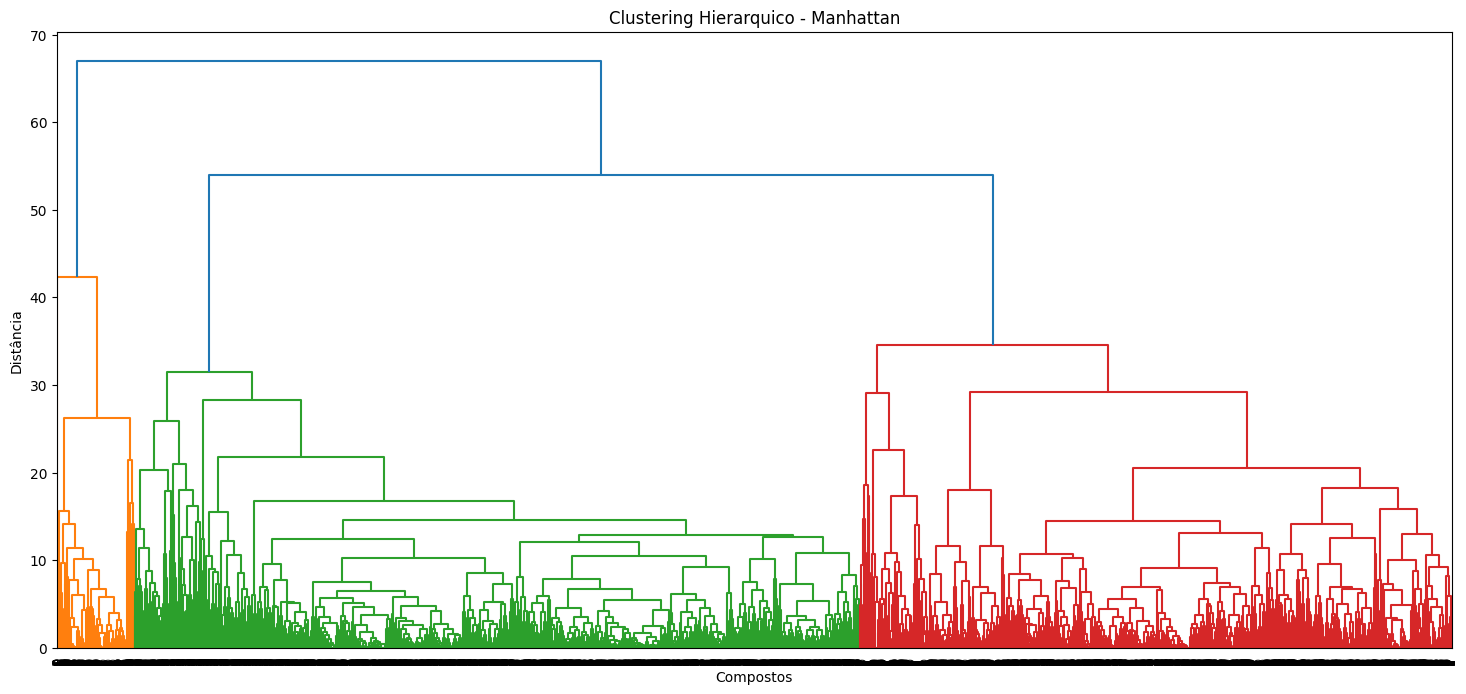

In [32]:
df_copy = df.copy()
df_copy.reset_index(drop=True, inplace=True)
# Clustering hierarquico com distância de manhattan
Z = linkage(df_scaled, method='complete', metric='cityblock')

# dendograma
plt.figure(figsize=(18, 8))
dendrogram(Z, 
           labels=df_copy['Y'].values, 
           orientation='top', 
           leaf_font_size=8)

# mapa de cores
data_colors = {0: 'blue', 1: 'green'}
ax = plt.gca()


plt.title('Clustering Hierarquico - Manhattan')
plt.xlabel('Compostos')
plt.ylabel('Distância')
plt.show()


In [33]:
# Criando os clusters usando o método fcluster 
k = 2 # número de clusters
clusters = fcluster(Z, k, criterion='maxclust')
y_true = df_copy['Y']

pd.crosstab(df_copy['Y'].values,columns=y_true, rownames=['clusters'])

Y            0     1
clusters            
0         3299     0
1            0  3974

A título de exemplo, decidiu-se efetuar uma análise de uma amostra composta por 100 compostos, construida a partir do dataset anterior.

Nos resultados abaixo apresentados já se torna possível uma melhor interpretação dos mesmos. É possível observar uma separação dos compostos mutagénicos e não mutagénicos, em dois clusters distintos, onde existe uma maior presença dos compostos mutagénicos (1) no cluster verde, e não mutagénicos (0) no cluster laranja.

In [34]:
df_scaled_y = pd.concat([df_scaled, df['Y']], axis=1)

In [35]:
sampled_data = df_scaled_y.sample(n=100, random_state=42)

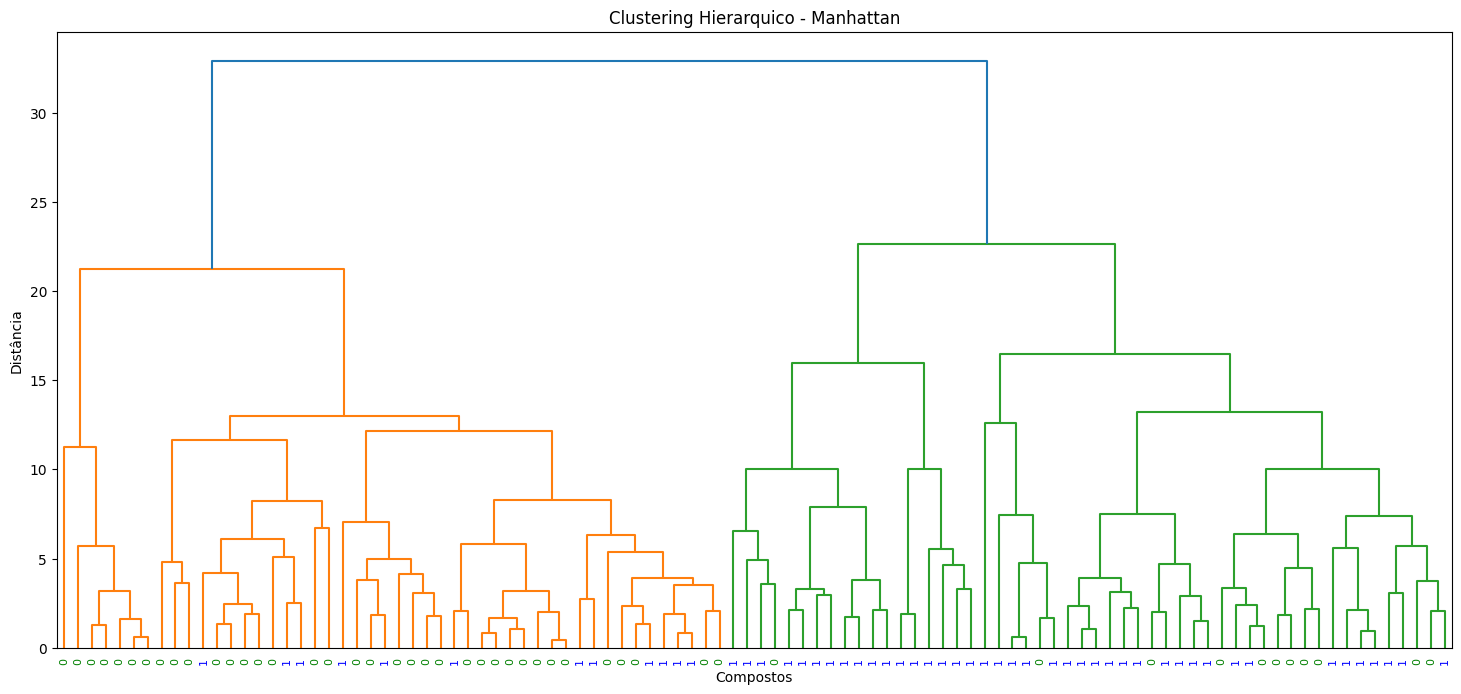

In [36]:
# Clustering hierarquico com distância de manhattan
Z = linkage(sampled_data, method='complete', metric='cityblock')

# dendograma
plt.figure(figsize=(18, 8))
dendrogram(Z, 
           labels=sampled_data['Y'].values, 
           orientation='top', 
           leaf_font_size=8)


# mapa de cores
data_colors = {'0': 'green', '1': 'blue'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(data_colors[lbl.get_text()])



plt.title('Clustering Hierarquico - Manhattan')
plt.xlabel('Compostos')
plt.ylabel('Distância')
plt.show()

#### Clustering (K-means)
</p>
<div style="text-align: justify">
Posteriormente, implementou-se outro algoritmo de clustering o K-means, que tem como objectivo minimizar a soma das distâncias entre cada ponto de dados e seu centróide correspondente. Em semelhança à distribuição dos dados nos clusters anteriores, o primeiro cluster obteve uma percentagem superior (72%) de compostos mutagénicos, enquanto o segundo cluster é mais equilibrado.
</div> 

In [37]:
df_copy1 = df.copy()
df_copy1.reset_index(drop=True, inplace=True)

#elbow method
wcss = list()
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)




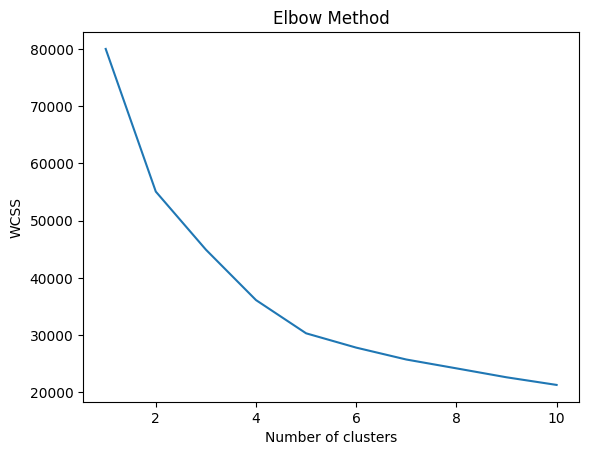

In [38]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

De modo a escolher o valor ótimo de clusters (k) através do 'elbow method', construiu-se o gráfico anterior. O valor ótimo de k será o 'elbow point' ou seja, o local onde se dá uma mudança acentuada no declive da curva.

No entanto, apesar de termos considerado o valor de k=2, este método torna-se algo subjetivo, uma vez que não há um local óbivo de inflexão da curva

In [39]:
# k-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_scaled)
labels_k = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels_k,df_copy1['Y'], rownames=['clusters'] )

Y            0     1
clusters            
0          717  1932
1         2582  2042

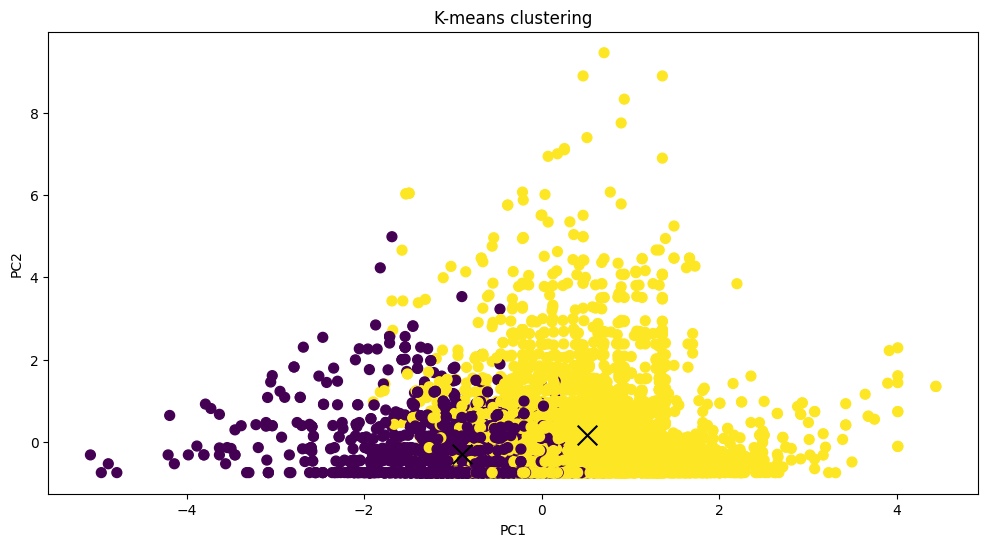

In [40]:
plt.figure(figsize=(12, 6))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=labels_k, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black')
plt.title('K-means clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Análise das features 'Molecular Weight' e 'LogP' 

</p>
<div style="text-align: justify">

Um dos principais aspetos a ser analisado é o espaço químico de cada grupo de compostos quimícos. O espaço químico refere-se ao espaço físico-químico de todas as moléculas. Duas propriedades comumente usadas para explorar o espaço químico são o peso molecular (MW) e o Logaritmo de partição (LogP). Deste modo, para além da análise das variaveis no top 10, procedemos á análise univariada das variaveis 'Molecular Weight' e 'LogP'</div>
</p>
<div style="text-align: justify">
O peso molecular (MW) é uma medida da massa de uma molécula, que permite obter informações sobre o tamanho e complexidade da molécula.</div>
</p>
<div style="text-align: justify">
O LogP determinada o coeficiente de partição entre a compontente n-octanol e a água na molécula, sendo aceite como uma medida da lipofilicidade de uma molécula. Por sua vez, a lipofilicidade é um dos parâmetros mais importantes que determinam os comportamentos farmacocinéticos e farmacodinâmicos de um medicamento.</div>
</p>
<div style="text-align: justify">
Para explorar o espaço químico usando o MW e o LogP, é possível construir gráficos de dispersão com os valores dessas propriedades em cada composto químico do dataset. Este gráfico poderá revelar tendências e padrões na distribuição de moléculas no espaço químico.</div>

In [41]:
#apesar de os valores de MW e LogP estarem presente no dataset 'features', optamos por obter estes mesmos valores através do package RDKit
df['MW'] = df['ROMol'].map(Descriptors.MolWt)
df['logP'] = df['ROMol'].map(Descriptors.MolLogP)

#normalização dos valores
scaler = StandardScaler()
# df[['MW', 'logP']] = scaler.fit_transform(df[['MW', 'logP']])

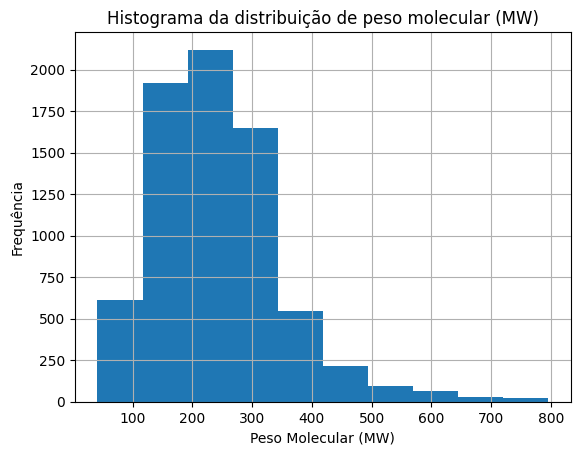

In [42]:
df['MW'].hist()
plt.title('Histograma da distribuição de peso molecular (MW)')
plt.xlabel('Peso Molecular (MW)')
plt.ylabel('Frequência')
plt.show()

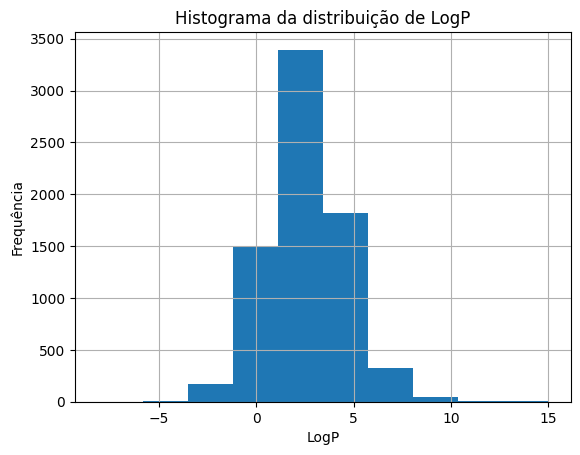

In [43]:
df['logP'].hist()
plt.title('Histograma da distribuição de LogP')
plt.xlabel('LogP')
plt.ylabel('Frequência')
plt.show()

</p>
<div style="text-align: justify">
Os histogramas das duas variáveis sugerem que a variável 'MW' (peso molecular) não segue uma disribuição normal, ao contrário da variável 'LogP' que aparenta seguir uma distribuição normal.</div>
</p>
<div style="text-align: justify">
No entanto, estas mesmas conclusões serão comprovadas mais à frente através de testes estatísticos.</div>

In [44]:
mw_logp_corr = df[['MW','logP']].corr()
print(mw_logp_corr)

            MW      logP
MW    1.000000  0.502693
logP  0.502693  1.000000


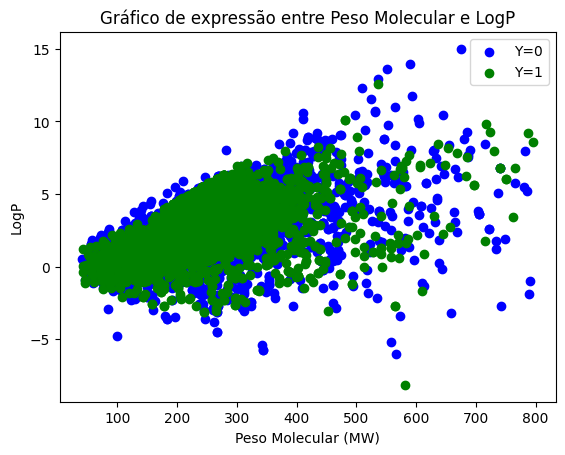

In [45]:
# Cria um dicionário de cores para os valores de Y
colors = {0: 'blue', 1: 'green'}

# Gera o gráfico de dispersão com cores diferentes para os pontos com valor 0 e 1 em Y
plt.scatter(df['MW'][df['Y']==0], df['logP'][df['Y']==0], c=colors[0], label='Y=0')
plt.scatter(df['MW'][df['Y']==1], df['logP'][df['Y']==1], c=colors[1], label='Y=1')
plt.xlabel('Peso Molecular (MW)')
plt.ylabel('LogP')
plt.title('Gráfico de expressão entre Peso Molecular e LogP')
plt.legend()
plt.show()

</p>
<div style="text-align: justify">
As duas variáveis (MW e LogP) apresentam uma correlação aproximada de 0.502, o que representa uma relação linear positiva moderada. Isto significa que, à medida que o peso molecular de um composto aumenta, o valor do seu logP também tende a aumentar, mesmo que alguma da variabilidade dos dados não seja explicada por esta relação linear. Estes resultados podem ser comparados com o gráfico de dispersão, que também apresenta uma relação linear entre as duas variáveis, embora esta não seja clara.</div>
</p>
<div style="text-align: justify">
Face aos resultados obtidos no gráfico de dispersão, os dois grupos de compostos químicos (mutagénicos e não mutagénicos) aparentam ter uma distribuição semelhante, logo, um espaço químico semelhante. Não são observados padrões ou tendências claros que possam distinguir os dois grupos de compostos químicos.</div>
</p>
<div style="text-align: justify">
Assim sendo, parece não haver uma relação clara entre a distribuição dos compostos químicos no espaço químico e a mutagenicidade dos compostos químicos.</div>
</p>
<div style="text-align: justify">
De modo a complementar o estudo da relação entre estas variáveis e a mutagenicidade, serão realizados alguns testes estatísticos nos pontos seguintes.</div>

</p>
<div style="text-align: justify">
Aqui serão executados testes estatísticos para verificar se existe relação entre as variáveis de Peso Molecular e Mutagenicidade. Os testes estatísticos foram realizados para um <em>alpha</em> de 0.05.</div>
</p>
<div style="text-align: justify">
Os resultados apresentados parecem não corroborar as conclusões já discutidas anteriormente. Neste caso, através de testes de estatísticos, verificou-se uma diferença nos valores do peso molecular apresentados pelos compostos mutagénicos e não mutagénicos.</div>

In [46]:
df['MW'][df['Y'] == 0].describe()

count    3299.000000
mean      243.336995
std       122.021677
min        41.053000
25%       152.149000
50%       221.303000
75%       307.267000
max       791.115000
Name: MW, dtype: float64

In [47]:
df['MW'][df['Y'] == 1].describe()

count    3974.000000
mean      241.931235
std        94.656045
min        42.037000
25%       178.187000
50%       237.280000
75%       289.203000
max       795.824000
Name: MW, dtype: float64

In [48]:
# teste à normalidade
stat, p = stats.shapiro(df['MW'])
print('Molecular Weight - teste à normalidade:\nStatistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('A variável "MW" (peso molecular) assume uma distribuição normal (falha em rejeitar H0)')
else:
    print('A variável "MW" (peso molecular) não assume uma distribuição normal (rejeita H0)')
print("\n")

# Mann-Whitney
stat, p = stats.mannwhitneyu(df['MW'][df['Y'] == 0], df['MW'][df['Y'] == 1])
print('Mann-Whitney U test:\nStatistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Não há diferença significativa entre as duas variáveis (falha em rejeitar H0)')
else:
    print('Há uma diferença significativa entre as duas variáveis (rejeita H0)')
print("\n")
    

Molecular Weight - teste à normalidade:
Statistics=0.930, p-value=0.000
A variável "MW" (peso molecular) não assume uma distribuição normal (rejeita H0)


Mann-Whitney U test:
Statistics=6259104.000, p-value=0.001
Há uma diferença significativa entre as duas variáveis (rejeita H0)




</p>
<div style="text-align: justify">
Aqui serão executados testes estatísticos para verificar se existe relação entre as variáveis de LogP e Mutagenicidade.</div>
</p>
<div style="text-align: justify">
Novamente, os resultados apresentados parecem não corroborar as conclusões já discutidas anteriormente. Neste caso, através de teste de estatísticos, verificou-se uma diferença nos valores do logP apresentados pelos compostos mutagénicos e não mutagénicos.</div>

In [49]:
df['logP'][df['Y'] == 0].describe()

count    3299.000000
mean        2.434715
std         2.149808
min        -6.054700
25%         1.102850
50%         2.338200
75%         3.655450
max        14.998800
Name: logP, dtype: float64

In [50]:
df['logP'][df['Y'] == 1].describe()

count    3974.000000
mean        2.562309
std         1.886056
min        -8.161100
25%         1.295450
50%         2.475310
75%         3.822905
max        12.605800
Name: logP, dtype: float64

In [51]:
# teste à normalidade
stat, p = stats.shapiro(df['logP'])
print('LogP - Teste à normalidade:\nStatistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('A variável logP não assume uma distribuição normal (falha em rejeitar H0)')
else:
    print('A variável logP assume uma distribuição normal (falha em rejeitar H0)')
print("\n")

# T-Test
stat, p = stats.ttest_ind(df['logP'][df['Y'] == 0], df['logP'][df['Y'] == 1])
print('T-Test:\nStatistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Não existe diferença significante entre as duas variáveis (falha em rejeitar H0)')
else:
    print('Existe uma diferença significante entre as duas variáveis (rejeita H0)')
print("\n")

LogP - Teste à normalidade:
Statistics=0.989, p-value=0.000
A variável logP assume uma distribuição normal (falha em rejeitar H0)


T-Test:
Statistics=-2.695, p-value=0.007
Existe uma diferença significante entre as duas variáveis (rejeita H0)




</p>
<div style="text-align: justify">
Nos gráficos boxplot abaixo apresentados, os valores do peso molecular apresentam um ligeiro desequilíbrio na distribuição de valores entre compostos mutagénicos e não mutagénicos.</div>
</p>
<div style="text-align: justify">
No entanto, os valores de LogP apresentam uma distribuição de valores equilibrada, independentemente da mutagenicidade do composto.</div>

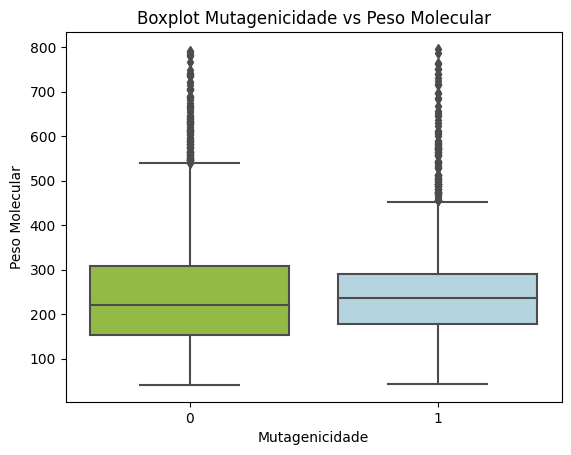

In [52]:
# create the boxplot

my_palette = ["#9ACD32", "#ADD8E6"]
sns.boxplot(x='Y', y='MW', data=df,palette=my_palette)

# add title and labels
plt.title('Boxplot Mutagenicidade vs Peso Molecular')
plt.xlabel('Mutagenicidade')
plt.ylabel('Peso Molecular')

# display the plot
plt.show()

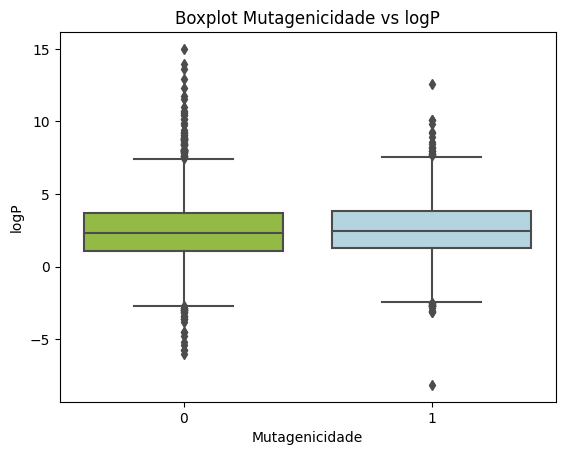

In [53]:
# create the boxplot

my_palette = ["#9ACD32", "#ADD8E6"]
sns.boxplot(x='Y', y='logP', data=df, palette=my_palette)

# add title and labels
plt.title('Boxplot Mutagenicidade vs logP')
plt.xlabel('Mutagenicidade')
plt.ylabel('logP')

# display the plot
plt.show()

## Relação entre compostos com potencial terapêutico e a mutagenicade

</p>
<div style="text-align: justify">
Existem várias regras e filtros que podem ser usados para selecionar moléculas com potencial terapêutico. Algumas das abordagens mais comuns incluem as regras de Lipinski, Ghose e Veber, que foram desenvolvidas para ajudar a identificar moléculas com propriedades farmacocinéticas favoráveis.</div> 
</p>
<div style="text-align: justify">
Nesta secção, pretende-se analisar se os compostos que obdecem a estes conjunto de regras e filtros são não mutagénicos. De modo a compreender se algum destes parâmetros poderá facilitar a previsão da mutagenicidade.  </div>

</p>
<div style="text-align: justify">
Para definir cada regra e filtro tendo em conta os descritores fornecidos, é necessário compreender os critérios de cada um.
A Regra de Lipinski é uma das abordagens mais conhecidas. Ela estabelece que, para uma molécula ser um possível fármaco, ela deve atender aos seguintes critérios:
</div>
</p>

- Peso molecular inferior a 500 daltons.</p>
- LogP (coeficiente de partição octanol-água) menor ou igual a 5.</p>
- Menos de cinco dadores de hidrogénio ligados ao nitrogénio ou oxigénio.</p>
- Menos de dez recetores de hidrogênio.</p>

</p>
<div style="text-align: justify">
A Regra de Ghose é outra abordagem comum para selecionar moléculas com potencial terapêutico. Esta regra estabelece que, para uma molécula ser um possível fármaco, a mesma deve atender aos seguintes critérios:</div>
</p>

 - Peso molecular entre 160 e 480 daltons.
 - LogP (coeficiente de partição octanol-água) entre -0,4 e 5,6.
 - Menos de dez átomos de hidrogénio ligados ao nitrogénio.
 - Menos de 12 átomos de hidrogénio ligados ao carbono alifático.

</p>
<div style="text-align: justify">
A Regra de Veber é outra abordagem comum para selecionar moléculas com potencial terapêutico. Essa regra estabelece que, para uma molécula ser um possível fármaco, ela deve atender aos seguintes critérios:
</div>
</p>

 - Não mais que dez ligações rotativas.
 - Não mais que dez doadores ou aceitadores de ligações de hidrogénio.
 - O tamanho máximo do anel não deve exceder oito átomos.
 - O número de átomos de oxigénio e nitrogénio não deve exceder um terço do número total de átomos na molécula.

</p>
<div style="text-align: justify">
As regras e filtros apresentadas são apenas algumas das abordagens comuns para selecionar moléculas com potencial terapêutico.

In [54]:
def get_descriptors(df):
    df['h_bond_donor'] = df['ROMol'].apply(lambda mol: Descriptors.NumHDonors(mol))
    df['h_bond_acceptors'] = df['ROMol'].apply(lambda mol: Descriptors.NumHAcceptors(mol))
    df['rotatable_bonds'] = df['ROMol'].apply(lambda mol: Descriptors.NumRotatableBonds(mol))
    df['number_of_atoms'] = df['ROMol'].apply(lambda mol: Chem.rdchem.Mol.GetNumAtoms(mol))
    df['molar_refractivity'] = df['ROMol'].apply(lambda mol: Chem.Crippen.MolMR(mol))
    df['topological_surface_area_mapping'] = df['ROMol'].apply(lambda mol: Chem.QED.properties(mol).PSA)
    df['formal_charge'] = df['ROMol'].apply(lambda mol: Chem.rdmolops.GetFormalCharge(mol))
    df['heavy_atoms'] = df['ROMol'].apply(lambda mol: Chem.rdchem.Mol.GetNumHeavyAtoms(mol))
    df['num_of_rings'] = df['ROMol'].apply(lambda mol: Chem.rdMolDescriptors.CalcNumRings(mol))
    return df 
    
def score(df):
    
    results = {
        "lipinski_rule": [0]*df.shape[0],
        "ghose_filter": [0]*df.shape[0],
        "veber_filter": [0]*df.shape[0],
        "three_filter": [0]*df.shape[0],
        "reos_filter": [0]*df.shape[0],
        "drug_like_filter":[0]*df.shape[0],
        "pass_all": [0]*df.shape[0]}
    
    for i, row in df.iterrows():
        MW = row['MW']
        logP = row['logP']
        h_bond_donor = row['h_bond_donor']
        h_bond_acceptors = row['h_bond_acceptors']
        rotatable_bonds = row['rotatable_bonds']
        number_of_atoms = row['number_of_atoms']
        molar_refractivity = row['molar_refractivity']
        topological_surface_area_mapping = row['topological_surface_area_mapping']
        formal_charge = row['formal_charge']
        heavy_atoms = row['heavy_atoms']
        num_of_rings = row['num_of_rings']
        
        # Lipinski
        if MW <= 500 and logP <= 5 and h_bond_donor <= 5 and h_bond_acceptors <= 10 and rotatable_bonds <= 5:
            results["lipinski_rule"][i] = 1

        # Ghose Filter
        if MW >= 160 and MW <= 480 and logP >= -0.4 and logP <= 5.6 and number_of_atoms >= 20 and number_of_atoms <= 70 and molar_refractivity >= 40 and molar_refractivity <= 130:
            results["ghose_filter"][i] = 1

        # Veber Filter
        if rotatable_bonds <= 10 and topological_surface_area_mapping <= 140:
            results["veber_filter"][i] = 1

        # Rule of 3
        if MW <= 300 and logP <= 3 and h_bond_donor <= 3 and h_bond_acceptors <= 3 and rotatable_bonds <= 3:
            results["three_filter"][i] = 1

        # REOS Filter
        if MW >= 200 and MW <= 500 and logP >= int(0 - 5) and logP <= 5 and h_bond_donor >= 0 and h_bond_donor <= 5 and h_bond_acceptors >= 0 and h_bond_acceptors <= 10 and formal_charge >= int(0-2) and formal_charge <= 2 and rotatable_bonds >= 0 and rotatable_bonds <= 8 and heavy_atoms >= 15 and heavy_atoms <= 50:
            results["reos_filter"][i] = 1

        #Drug Like Filter
        if MW < 400 and num_of_rings > 0 and rotatable_bonds < 5 and h_bond_donor <= 5 and h_bond_acceptors <= 10 and logP < 5:
            results["drug_like_filter"][i] = 1
        
        f = 0 
        for key, value in results.items():
            if results[key][i] == 1:
                f += 1
        if f == 6: 
            results["pass_all"][i] = 1 
        df_filters = pd.DataFrame.from_dict(results)
    return df_filters

get_descriptors(df)
df_filters = score(df)
print(df_filters)

      lipinski_rule  ghose_filter  veber_filter  three_filter  reos_filter  \
0                 0             1             1             0            0   
1                 0             1             1             0            0   
2                 0             0             1             0            0   
3                 1             0             1             1            0   
4                 1             0             1             1            0   
...             ...           ...           ...           ...          ...   
7268              0             0             0             0            0   
7269              1             0             1             0            1   
7270              1             0             1             0            0   
7271              1             0             1             1            0   
7272              0             0             1             0            0   

      drug_like_filter  pass_all  
0                    0      

</p>
<div style="text-align: justify">Após aplicação das regras e filtros a cada um dos compostos, verificou-se que 27 dos compostos cumprem os critérios, sendo eles os descritos de seguida. Em que se verificou uma distribuiçao equilibrada quanto á sua mutagenicidade. Logo, mesmo que os compostos tenham elevado potencial terapêutico não implica que não tenha um perfil mutagênico. </div>

In [55]:
if (df_filters['pass_all'] == 1).any():
    print('{} compostos cumprem os critérios de todos os filtros'.format(df[df_filters['pass_all'] == 1].shape[0]))
else: print('Nenhum composto')

27 compostos cumprem os critérios de todos os filtros


In [56]:
df[df_filters['pass_all'] == 1][['ids', 'Y']]

ids  Y
377    Drug 378  1
474    Drug 475  1
666    Drug 667  1
932    Drug 933  0
1428  Drug 1429  1
1546  Drug 1547  1
1864  Drug 1865  1
2116  Drug 2117  1
2595  Drug 2596  1
2640  Drug 2641  1
2695  Drug 2696  1
3600  Drug 3602  1
3616  Drug 3618  0
3631  Drug 3633  0
4237  Drug 4240  1
4487  Drug 4490  0
4903  Drug 4906  1
5009  Drug 5012  0
5099  Drug 5102  1
5482  Drug 5486  0
5539  Drug 5543  0
6073  Drug 6077  0
6722  Drug 6804  1
6761  Drug 6843  1
6952  Drug 7034  0
7020  Drug 7102  0
7233  Drug 7503  1

#### Filtros vs Mutagenicidade

In [57]:
filters_y = pd.concat([df['Y'], df_filters], axis=1)
filters_y

Y  lipinski_rule  ghose_filter  veber_filter  three_filter  reos_filter  \
0     1              0             1             1             0            0   
1     1              0             1             1             0            0   
2     0              0             0             1             0            0   
3     1              1             0             1             1            0   
4     1              1             0             1             1            0   
...  ..            ...           ...           ...           ...          ...   
7268  0              0             0             0             0            0   
7269  0              1             0             1             0            1   
7270  0              1             0             1             0            0   
7271  0              1             0             1             1            0   
7272  0              0             0             1             0            0   

      drug_like_filter  pass_all  
0                    0         0  
1                    0         0  
2                    0         0  
3                    0         0  
4                    1         0  
...                ...       ...  
7268                 0         0  
7269                 1         0  
7270                 0         0  
7271                 1         0  
7272                 0         0  

[7273 rows x 8 columns]

</p>
<div style="text-align: justify"> Realizou-se um teste qui-quadrado para determinar se há uma associação estatisticamente significativa entre as variáveis binárias (Mutagenicidade e Filtros).</div>
</p>
<div style="text-align: justify">
Em todos os casos o valor de p-value é muito menor que 0.05, isso significa que há evidências estatísticas significativas de que a distribuição de frequência observada nos dados é diferente da distribuição de frequência esperada. Em outras palavras, há uma associação significativa entre as variáveis categóricas testadas.
</div>

In [58]:
lipinski_table = pd.crosstab(filters_y['Y'],filters_y['lipinski_rule'])
stat, p, dof, expected = chi2_contingency(lipinski_table)
print("Chi-square = ", stat)
print("p-value = ", p)
print("Graus de Liberdade = ", dof)

Chi-square =  15.949762641620936
p-value =  6.504593455869497e-05
Graus de Liberdade =  1


In [59]:
ghose_table = pd.crosstab(filters_y['Y'],filters_y['ghose_filter'])
stat, p, dof, expected = chi2_contingency(ghose_table)
print("Chi-square = ", stat)
print("p-value = ", p)
print("Graus de Liberdade = ", dof)

Chi-square =  25.70179385478958
p-value =  3.9845650760378914e-07
Graus de Liberdade =  1


In [60]:
veber_filter = pd.crosstab(filters_y['Y'],filters_y['veber_filter'])
stat, p, dof, expected = chi2_contingency(veber_filter)
print("Chi-square = ", stat)
print("p-value = ", p)
print("Graus de Liberdade = ", dof)

Chi-square =  45.57579531857671
p-value =  1.4684501852310006e-11
Graus de Liberdade =  1


In [61]:
three_filter = pd.crosstab(filters_y['Y'],filters_y['three_filter'])
stat, p, dof, expected = chi2_contingency(three_filter)
print("Chi-square = ", stat)
print("p-value = ", p)
print("Graus de Liberdade = ", dof)

Chi-square =  60.511048293685576
p-value =  7.316666556328223e-15
Graus de Liberdade =  1


In [62]:
reos_filter = pd.crosstab(filters_y['Y'],filters_y['reos_filter'])
stat, p, dof, expected = chi2_contingency(reos_filter)
print("Chi-square = ", stat)
print("p-value = ", p)
print("Graus de Liberdade = ", dof)

Chi-square =  78.50846993860289
p-value =  7.965597142915431e-19
Graus de Liberdade =  1


In [63]:
drug_like_filter = pd.crosstab(df['Y'],df_filters['drug_like_filter'])
stat, p, dof, expected = chi2_contingency(drug_like_filter)
print("Chi-square = ", stat)
print("p-value = ", p)
print("Graus de Liberdade = ", dof)

Chi-square =  56.3503613335554
p-value =  6.064213012102592e-14
Graus de Liberdade =  1


</p>
<div style="text-align: justify"> De modo a identificar possiveis relações entre as variáveis binárias , determinou-se as respetivas correlações.
Olhando para a matriz, podemos observar que há algumas correlações positivas moderadas entre lipinski_rule e drug_like_filter (0.66), reos_filter e ghose_filter (0.45), e reos_filter e drug_like_filter (0.3). Há também algumas correlações negativas moderadas, como entre ghose_filter e three_filter (-0.36) e three_filter e reos_filter (-0.43).</div>
</p>
<div style="text-align: justify">
No entanto, em geral, as correlações entre essas variáveis são bastante fracas (próximas de 0), o que sugere que elas não estão fortemente relacionadas umas com as outras. Portanto, é possível que cada variável contribua de forma única para o modelo e que nenhuma delas possa ser descartada sem perda de informação importante.</div>

In [64]:
filters_y_corr = filters_y[['Y','lipinski_rule','ghose_filter','three_filter','reos_filter','drug_like_filter']].corr()
print(filters_y_corr)

                         Y  lipinski_rule  ghose_filter  three_filter  \
Y                 1.000000       0.047162      0.059768     -0.091512   
lipinski_rule     0.047162       1.000000     -0.132354      0.358751   
ghose_filter      0.059768      -0.132354      1.000000     -0.361978   
three_filter     -0.091512       0.358751     -0.361978      1.000000   
reos_filter       0.104178       0.202016      0.452297     -0.433997   
drug_like_filter  0.088305       0.664105     -0.017854      0.157563   

                  reos_filter  drug_like_filter  
Y                    0.104178          0.088305  
lipinski_rule        0.202016          0.664105  
ghose_filter         0.452297         -0.017854  
three_filter        -0.433997          0.157563  
reos_filter          1.000000          0.295366  
drug_like_filter     0.295366          1.000000  


</p>
<div style="text-align: justify">Deste modo, não é aplicavel a implementação das regras e filtros da avalição de potencial terapêutico, em relação à mutagenicidade dos compostos.</div>

## Fingerprints

</p>
<div style="text-align: justify">
As "fingerprints" na análise de moléculas SMILES referem-se a códigos numéricos ou binários que são gerados a partir da representação da estrutura molecular da molécula na forma de SMILES.
</div>
</p>
<div style="text-align: justify">
Esses códigos são úteis para descrever a estrutura molecular de uma molécula de forma concisa e eficiente, permitindo a sua rápida identificação e comparação com outras moléculas. Eles podem ser gerados usando uma variedade de algoritmos de codificação e podem incluir informações sobre a topologia molecular, subestruturas, propriedades químicas, entre outros.
</div>
</p>
<div style="text-align: justify">
As fingerprints podem ser usadas em várias aplicações, incluindo a análise de similaridade molecular, virtual screening e modelagem de QSAR (Quantitative Structure-Activity Relationship), onde as propriedades bioativas das moléculas são correlacionadas com suas características estruturais.
</div>
</p>
<div style="text-align: justify">
Deste modo, pretende-se utilizar as "fingerprints" como atributos para a predição da mutagenicidade, em que as selecionadas foram o algoritmo de Morgan, MACCS keys e PubChem. 
</div>

### CIRCULAR MORGAN FINGERPRINT
</p>
<div style="text-align: justify">
O algoritmo Morgan usa uma abordagem de vizinhança que considera os átomos adjacentes a um átomo central, bem como os átomos adjacentes a esses átomos, formando um conjunto de anéis (ou "círculos") que circundam o átomo central. A partir desses círculos, o algoritmo cria uma série de vetores binários, que são usados para gerar a Morgan Circular Fingerprint.</div>
</p>
<div style="text-align: justify">
A Morgan Circular Fingerprint é uma representação compacta da estrutura molecular de uma molécula e é frequentemente usada em aplicações de aprendizado de máquina para classificação, agrupamento e previsão de propriedades de moléculas. É particularmente útil na análise de grandes conjuntos de moléculas, pois permite uma análise rápida e eficiente da similaridade estrutural entre elas.</div>

In [65]:
class MFP:

    def __init__(self, fp, names):
        self.fp = fp
        self.names = names
    def __str__(self):
        return "%d bit MFP" % len(self.fp)
    def __len__(self):
        return len(self.fp)

def get_mfp(mol, radius=2, nBits=1024, useFeatures=False, counts=False, dtype=np.float32):
    arr = np.zeros((1,), dtype)
    
    if counts is True:
        info = {}
        fp = AllChem.GetHashedMorganFingerprint(mol, radius, nBits, useFeatures=useFeatures)
        DataStructs.ConvertToNumpyArray(fp, arr)
    else:
        DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits, useFeatures=useFeatures), arr)
    return MFP(arr, range(nBits))

In [66]:
df['MFP'] = df['ROMol'].map(get_mfp)

In [67]:
X = np.array([x.fp for x in df['MFP']])
df['MFP_array'] = pd.Series(X.tolist())

#### t-SNE
</p>
<div style="text-align: justify">
t-SNE (t-distributed stochastic neighbor embedding) é um algoritmo de redução de dimensionalidade usado para visualizar dados de alta dimensão em um espaço de duas ou três dimensões. Ele mapeia pontos de dados de alta dimensão para um espaço de baixa dimensão preservando as distâncias entre eles o máximo possível. O t-SNE é especialmente útil para a visualização de dados complexos, onde se inclui os fingerprints.</div>

In [68]:
model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_drugs = model.fit_transform(X)

In [69]:
df['TSNE_C1'] = tsne_drugs.T[0]
df['TSNE_C2'] = tsne_drugs.T[1]

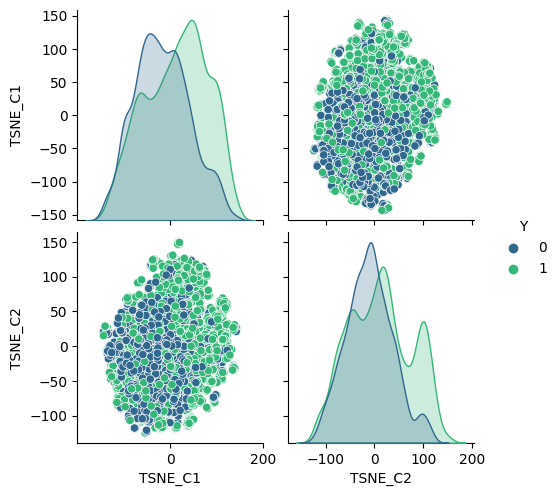

In [70]:
sns.pairplot(df, hue='Y', vars=['TSNE_C1', 'TSNE_C2'], palette='viridis')

#### Análise dos Componentes Principais (PCA)

In [71]:
pca = PCA(n_components=3, random_state=0)
pca_drugs = pca.fit_transform(X)

#obter as percentagens de variabilidade explicadas por cada PC
varia_exp = pca.explained_variance_ratio_
matriz_var_exp = np.diag(varia_exp*100)
print(matriz_var_exp)

[[5.170947  0.        0.       ]
 [0.        3.474958  0.       ]
 [0.        0.        2.9210973]]


In [72]:
df['pc1'] = pca_drugs.T[0]
df['pc2'] = pca_drugs.T[1]
df['pc3'] = pca_drugs.T[2]

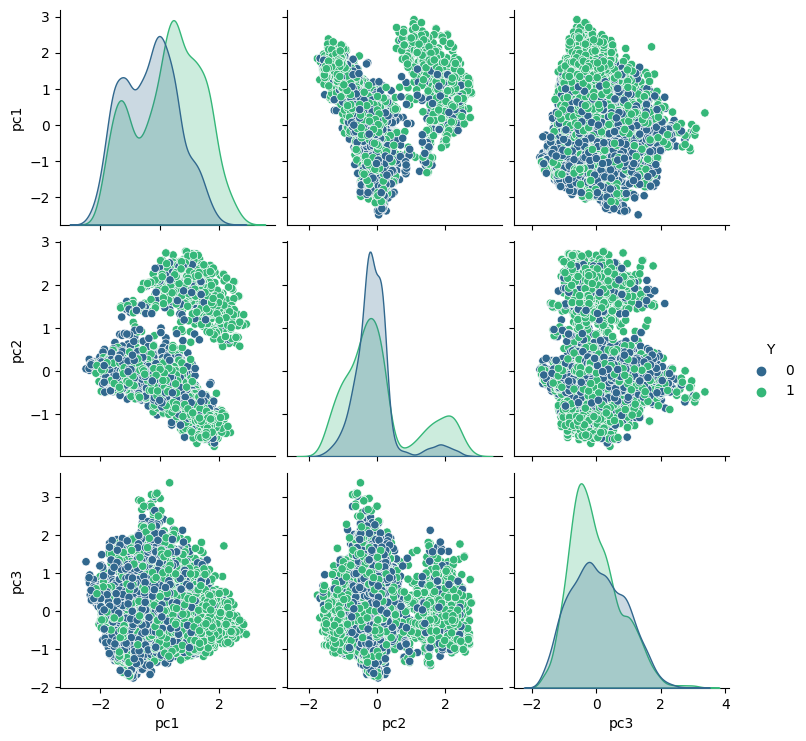

In [73]:
sns.pairplot(df, hue='Y', vars=['pc1', 'pc2', 'pc3'], palette='viridis')

No caso de dados de alta dimensionalidade, recomenda-se reduzir o número de dimensões com outro método antes de prosseguir com o t-SNE.

In [74]:
pca_model = PCA(n_components=30, random_state=0)
tsne_model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_pca = tsne_model.fit_transform(pca_model.fit_transform(X))

In [75]:
df['tsne_pca1'] = tsne_pca.T[0]
df['tsne_pca2'] = tsne_pca.T[1]

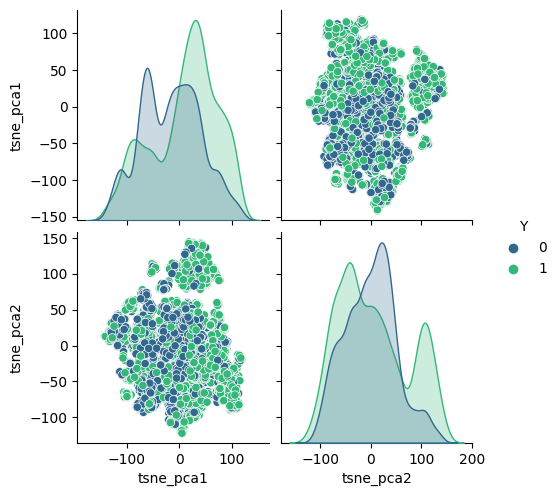

In [76]:
sns.pairplot(df, hue='Y', vars=['tsne_pca1', 'tsne_pca2' ], palette='viridis')

In [77]:
# Realiza o clustering hierárquico na matriz de similaridade
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_hc = hierarchical_clustering.fit_predict(tsne_pca)

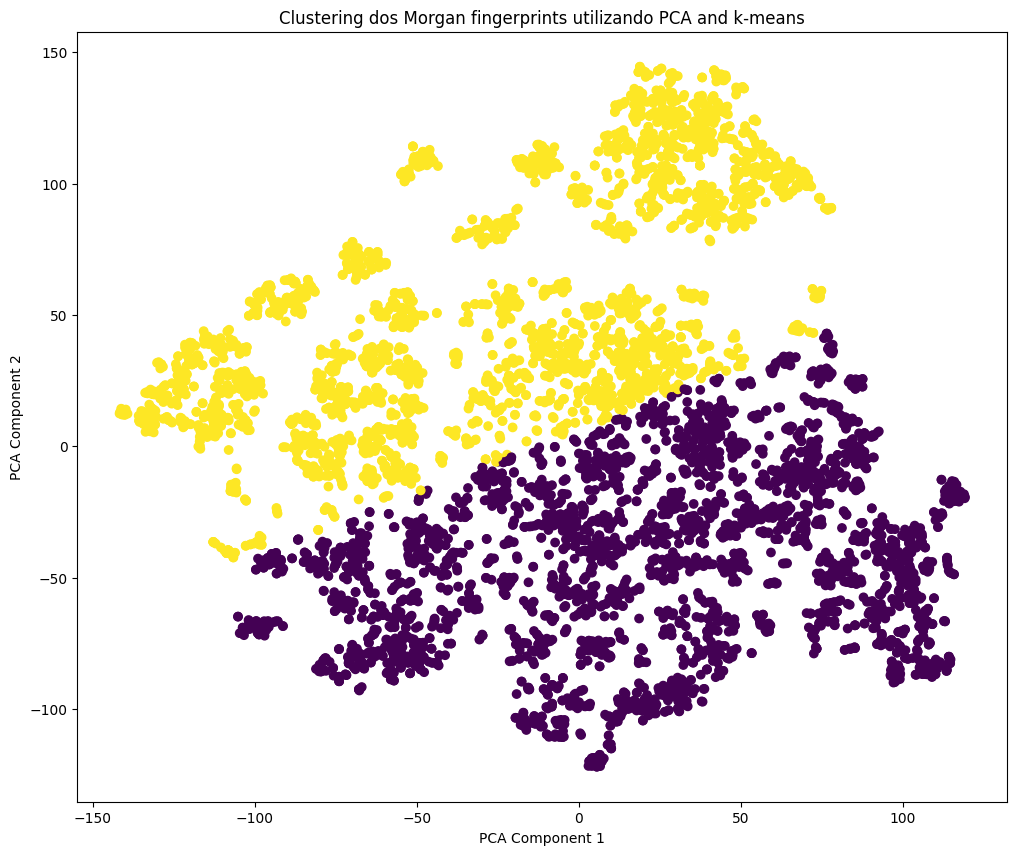

In [78]:
# Realiza o k-means clustering com k=3
kmeans = KMeans(n_clusters=2, random_state=0).fit(tsne_pca)
labels = kmeans.labels_
plt.figure(figsize=(12, 10))
plt.scatter(tsne_pca[:, 0], tsne_pca[:, 1], c=labels, cmap='viridis')
plt.title('Clustering dos Morgan fingerprints utilizando PCA and k-means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### MACCS KEY FINGERPRINT
</p>
<div style="text-align: justify">
A MACCS Key Fingerprint é composta por um conjunto fixo de chaves binárias (bits) que representam a presença ou ausência de cada uma das subestruturas moleculares selecionadas. Essas subestruturas são derivadas de um conjunto de regras de estruturação desenvolvidas para incluir grupos funcionais comuns em moléculas bioativas.</div>

In [79]:
# Gera os MACCS fingerprints para cada molécula e adiciona ao df 
def maccs(mol):
    return MACCSkeys.GenMACCSKeys(mol)
df['maccs'] = df['smiles'].apply(lambda x: maccs(Chem.MolFromSmiles(x)))    

In [80]:
# calcula a matriz de similaridade dos fingerprints
mols = df['ROMol']
fps = [AllChem.GetMACCSKeysFingerprint(mol) for mol in mols]
similarity_matrix = np.zeros((len(mols), len(mols)))
for i in range(len(mols)):
    for j in range(i, len(mols)):
        similarity = DataStructs.FingerprintSimilarity(fps[i], fps[j])
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity
print(similarity_matrix)

[[1.         0.75       0.33333333 ... 0.15384615 0.08       0.30357143]
 [0.75       1.         0.22       ... 0.17307692 0.1        0.27586207]
 [0.33333333 0.22       1.         ... 0.07407407 0.18181818 0.33962264]
 ...
 [0.15384615 0.17307692 0.07407407 ... 1.         0.20930233 0.22413793]
 [0.08       0.1        0.18181818 ... 0.20930233 1.         0.2745098 ]
 [0.30357143 0.27586207 0.33962264 ... 0.22413793 0.2745098  1.        ]]


In [81]:
# Realiza a PCA para reduzir a dimensionalidade dos dados
pca = PCA(n_components=2)
pca_data = pca.fit_transform(similarity_matrix)

In [82]:
# Realiza o clustering hierárquico na matriz de similaridade
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_hc = hierarchical_clustering.fit_predict(pca_data)

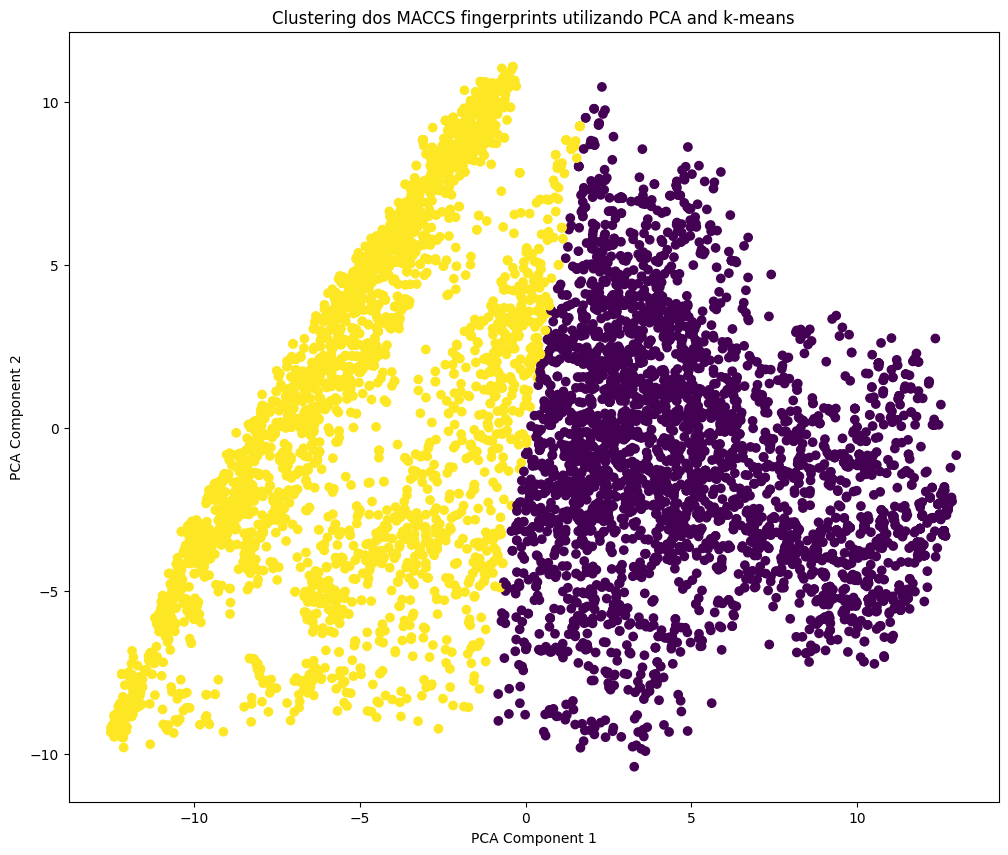

In [83]:
# Realiza o k-means clustering com k=3
kmeans = KMeans(n_clusters=2, random_state=0).fit(pca_data)
labels = kmeans.labels_
plt.figure(figsize=(12, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.title('Clustering dos MACCS fingerprints utilizando PCA and k-means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### PubChem Fingerprinting
</p>
<div style="text-align: justify">
O sistema PubChem tem como função a criação de uma subestrutura binária 'fingerprint' para esturuturas químicas. Estas 'fingerprints' são usadas na base de dados PubChem para a procura de similariedade entre vizinhos e na pesquisa. </div>
</p>
<div style="text-align: justify">
Cada fragmento de uma estrutura química é representado pela substrutura. O 'fingerprint' é uma lista binária (bits) ordenada (1 ou 0). Cada bit representa a determinação boleana para a presença de uma característica química estrutural.</div>
</p>
<div style="text-align: justify">
Neste momento a PubChem fingerprints tem 881 bits, armazenando 880 características estruturais.</div> 

In [84]:
# gera as representações de PubChem Fingerprinting
mol = df['ROMol']
df['ap_fingerprint'] = df['ROMol'].apply(lambda mol: GetHashedAtomPairFingerprintAsBitVect(mol))
df['tt_fingerprint'] = df['ROMol'].apply(lambda mol: GetHashedTopologicalTorsionFingerprintAsBitVect(mol))

# exibe as representações de PubChem Fingerprinting
print('Atom Pair Fingerprint:')
print(df['ap_fingerprint'])

print('Topological Torsion Fingerprint:')
print(df['tt_fingerprint'])

Atom Pair Fingerprint:
0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, ...
3       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
7268    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
7269    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
7270    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
7271    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
7272    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: ap_fingerprint, Length: 7273, dtype: object
Topological Torsion Fingerprint:
0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 

#### Análise dos Componentes Principais (PCA)

In [85]:
# Criar uma matriz a partir dos fingerprints
ap_fps = np.array([np.frombuffer(bytes(fp.ToBitString(), 'utf-8'), dtype=np.uint8) for fp in df['ap_fingerprint']])
tt_fps = np.array([np.frombuffer(bytes(fp.ToBitString(), 'utf-8'), dtype=np.uint8) for fp in df['tt_fingerprint']])

# Padronizar os dados
ap_fps = StandardScaler().fit_transform(ap_fps)
tt_fps = StandardScaler().fit_transform(tt_fps)

In [86]:
# Aplicar PCA aos dados padronizados

pca = PCA(n_components=2)
ap_pca = pca.fit_transform(ap_fps)
tt_pca = pca.fit_transform(tt_fps)

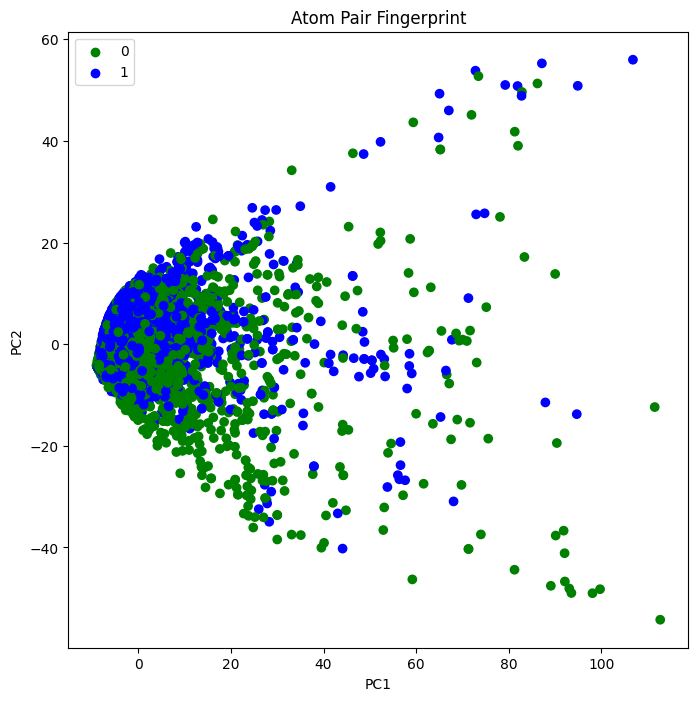

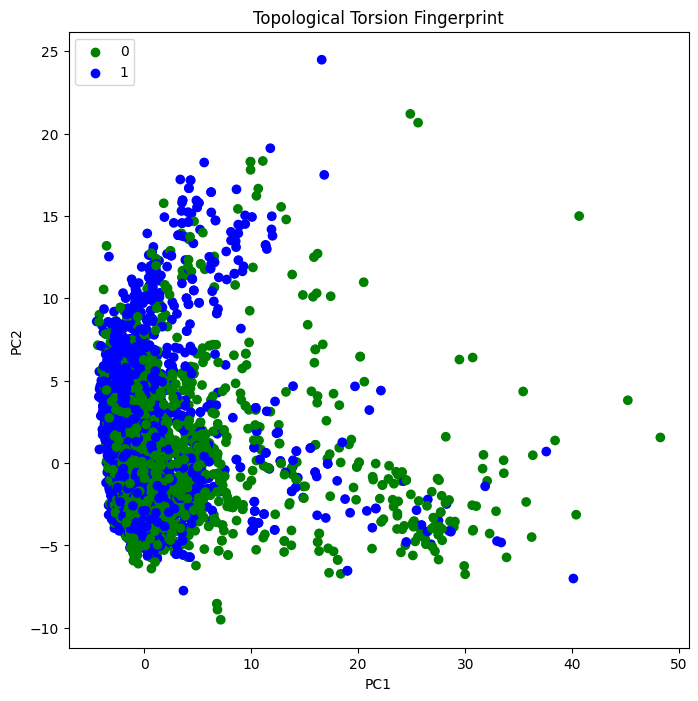

In [87]:
%matplotlib inline
# mapa de cores para o plot
data_colors = {0: 'green', 1: 'blue'}
colors = [data_colors[t] for t in df['Y']]

# plot
plt.figure(figsize=(8, 8))
plt.scatter(ap_pca[:, 0], ap_pca[:, 1], c=colors)
plt.title('Atom Pair Fingerprint')
plt.xlabel('PC1')
plt.ylabel('PC2')

# legenda
handles = []
labels = []
for data_type, color in data_colors.items():
    handles.append(plt.scatter([], [], c=color))
    labels.append(data_type)# legenda
plt.legend(handles, labels, loc='upper left')

plt.figure(figsize=(8, 8))
plt.scatter(tt_pca[:, 0], tt_pca[:, 1], c=colors)
plt.title('Topological Torsion Fingerprint')
plt.xlabel('PC1')
plt.ylabel('PC2')

# legenda
handles = []
labels = []
for data_type, color in data_colors.items():
    handles.append(plt.scatter([], [], c=color))
    labels.append(data_type)# legenda
plt.legend(handles, labels, loc='upper left')


### 

### Split do dataset de acordo com as similiariedades

</p>
<div style="text-align: justify">
De modo a definir o 'test set' recorreu-se à clusterização por similaridade em que se atribuiu instâncias de cada cluster de forma equilibrada, garantindo que cada conjunto contenha uma representação adequada de diferentes padrões presentes nos dados.
Deste modo, implementou-se a  função chamada 'generate_similarities', que calcula as similaridades entre moléculas representadas por SMILES usando Morgan fingerprints. Em seguida, realizou-se uma redução de dimensionalidade usando o t-SNE, seguido do algoritmo K-means para clusterizar os dados de similaridade reduzidos.</div>

In [88]:
def generate_similarities(smiles):
    fps = []
    similarities_list = []
    for smiles in smiles:
        fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smiles), 2, 2048)
        fps.append(fp)
    
    if len(fps) > 10000:
        entries = 10000
    else:
        entries = len(fps)
        
    for i in range(0,entries):
        
        remaining_fp = fps[:i] + fps[i+1:]
        similarities = DataStructs.BulkTanimotoSimilarity(fps[i], remaining_fp)
        similarities.insert(i,1)
        similarities_list.append(similarities)
        
    return np.transpose(np.array(similarities_list))

In [89]:
np.random.seed(42)
similaridades=generate_similarities(df.smiles)

In [90]:
# generate tSNE latent space of molecular similarities
tsne_similarities = TSNE(n_components=2,random_state=42).fit_transform(similaridades)

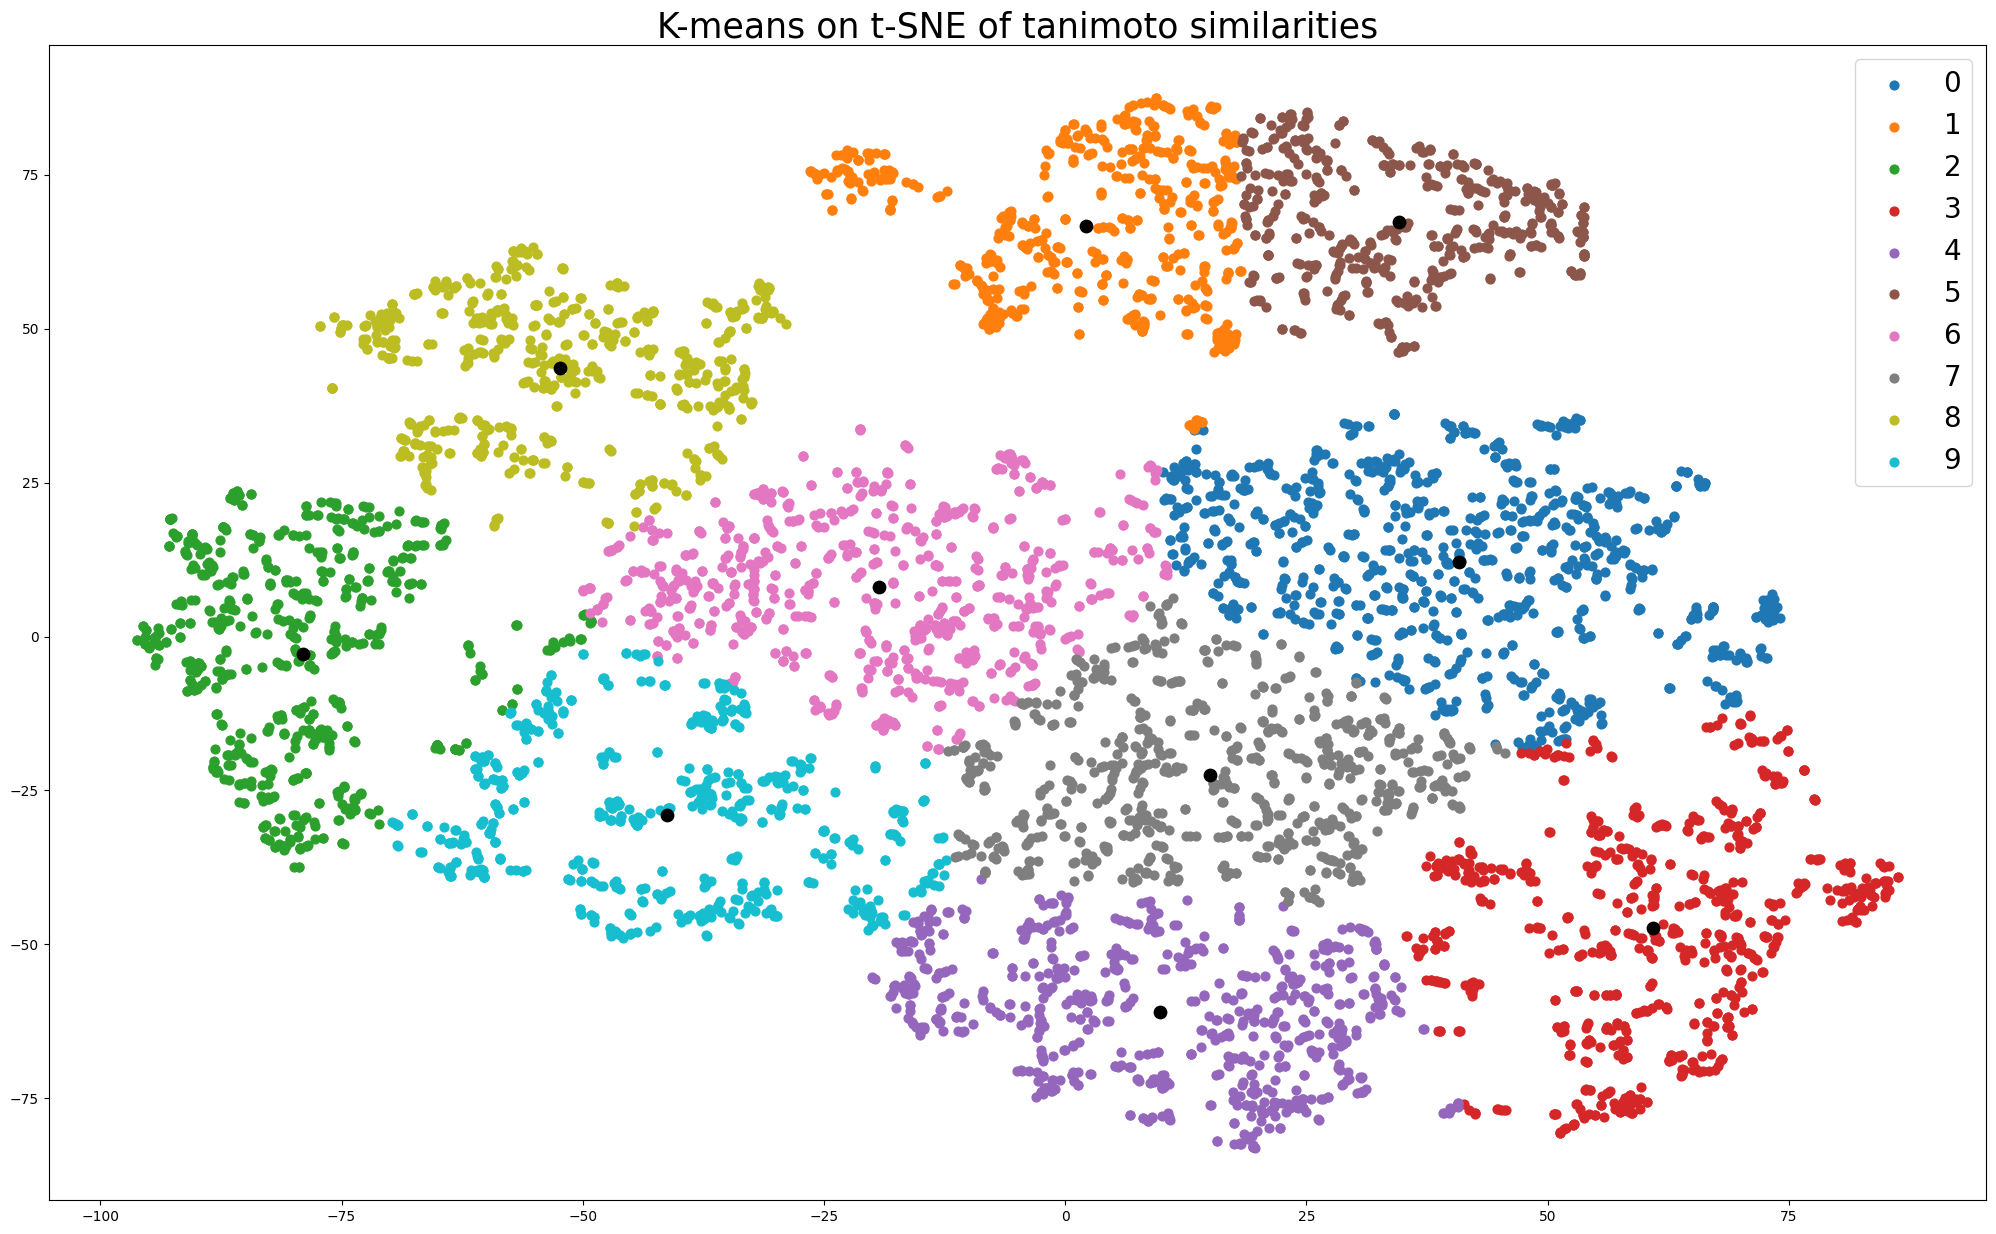

In [91]:
kmeans = KMeans(n_clusters=10,random_state=42).fit(tsne_similarities)
u_labels = np.unique(kmeans.labels_)
plt.subplots(1, figsize=(25, 15))
# plotting the results:
centroids = kmeans.cluster_centers_
for i in u_labels:
    plt.scatter(tsne_similarities[kmeans.labels_ == i, 0], tsne_similarities[kmeans.labels_ == i, 1], label=i, s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color='k')
plt.legend(prop={'size': 20})
plt.title("K-means on t-SNE of tanimoto similarities", fontsize=25)
plt.show()

In [92]:
df['kmeans'] = kmeans.labels_

In [93]:
df.columns

Index(['ids', 'smiles', 'Y', 'ROMol', 'MW', 'logP', 'h_bond_donor',
       'h_bond_acceptors', 'rotatable_bonds', 'number_of_atoms',
       'molar_refractivity', 'topological_surface_area_mapping',
       'formal_charge', 'heavy_atoms', 'num_of_rings', 'MFP', 'MFP_array',
       'TSNE_C1', 'TSNE_C2', 'pc1', 'pc2', 'pc3', 'tsne_pca1', 'tsne_pca2',
       'maccs', 'ap_fingerprint', 'tt_fingerprint', 'kmeans'],
      dtype='object')

In [94]:
columns_to_remove =['MFP','smiles', 'ROMol','MW', 'logP', 'h_bond_donor',
       'h_bond_acceptors', 'rotatable_bonds', 'number_of_atoms',
       'molar_refractivity', 'topological_surface_area_mapping',
       'formal_charge', 'heavy_atoms', 'num_of_rings','TSNE_C1',
       'TSNE_C2', 'pc1', 'pc2', 'pc3', 'tsne_pca1', 'tsne_pca2']
df_ml=df.drop(columns=columns_to_remove)
df_ml.columns

Index(['ids', 'Y', 'MFP_array', 'maccs', 'ap_fingerprint', 'tt_fingerprint',
       'kmeans'],
      dtype='object')

</p>
<div style="text-align: justify">
 Tendo em conta a distribuição dos dados pelos 10 clusters, definiu-se a função 'create_subset_clusters' que permiti obter o subset equilibrado, uma vez que foram adicionados compostos químicos de todos clusters ordenados até obter um subset com 15% dos dados. Assim, a função retornou o 'test set' e o dataframe original sem os dados selecionados para o 'test set'.</div>

In [95]:
def create_subset_clusters(df, u_labels, per_dec):
    test_set = pd.DataFrame()
    df_sem_subset = df.copy()

    for i in range(int(per_dec * len(df))):
        cluster = u_labels[i % len(u_labels)]
        sub_sf = df_sem_subset.loc[df_sem_subset['kmeans'] == cluster]
        row = sub_sf.sample(n=1,random_state=42)
        df_sem_subset = df_sem_subset.drop(row.index)
        test_set = test_set.append(row)

    return test_set, df_sem_subset

In [96]:
np.random.seed(42)
test_set_final, df_sem_testset = create_subset_clusters(df_ml, u_labels, 0.15)

In [97]:
df_sem_testset.shape

(6183, 7)

In [98]:
test_set_final.shape

(1090, 7)

 </p>
<div style="text-align: justify">
  O próximo passo consistiu em obter o 'validation set' que será posteriormente implementado nos modelos de DL. Em que se aplicou a mesma função, com intuito de obter outro subset com 15% dos dados. Além disso, retornou-se o 'train set' que corresponde a 70 % dos compostos químicos.</div>

In [99]:
np.random.seed(42)
validation_set, train_set = create_subset_clusters(df_sem_testset, u_labels, 0.1763)

In [110]:
train_set.shape
train_set.columns
list(train_set.maccs[1])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0]

In [101]:
validation_set.shape

(1090, 7)

In [102]:
test_set_final['subset'] =['test']*len(test_set_final)
validation_set['subset'] =['validation']*len(validation_set)
train_set['subset'] =['train']*len(train_set)

In [103]:
set_df = pd.concat([test_set_final,validation_set,train_set])
set_df.shape

(7273, 8)

 </p>
<div style="text-align: justify">
De seguida recorreu-se à representação gráfica dos clusters tendo em conta a distinção dos 'subsets', em que se verificou uma distribuição equilibrada dos dados tanto no 'test set' como 'validation set' como esperado. </div>

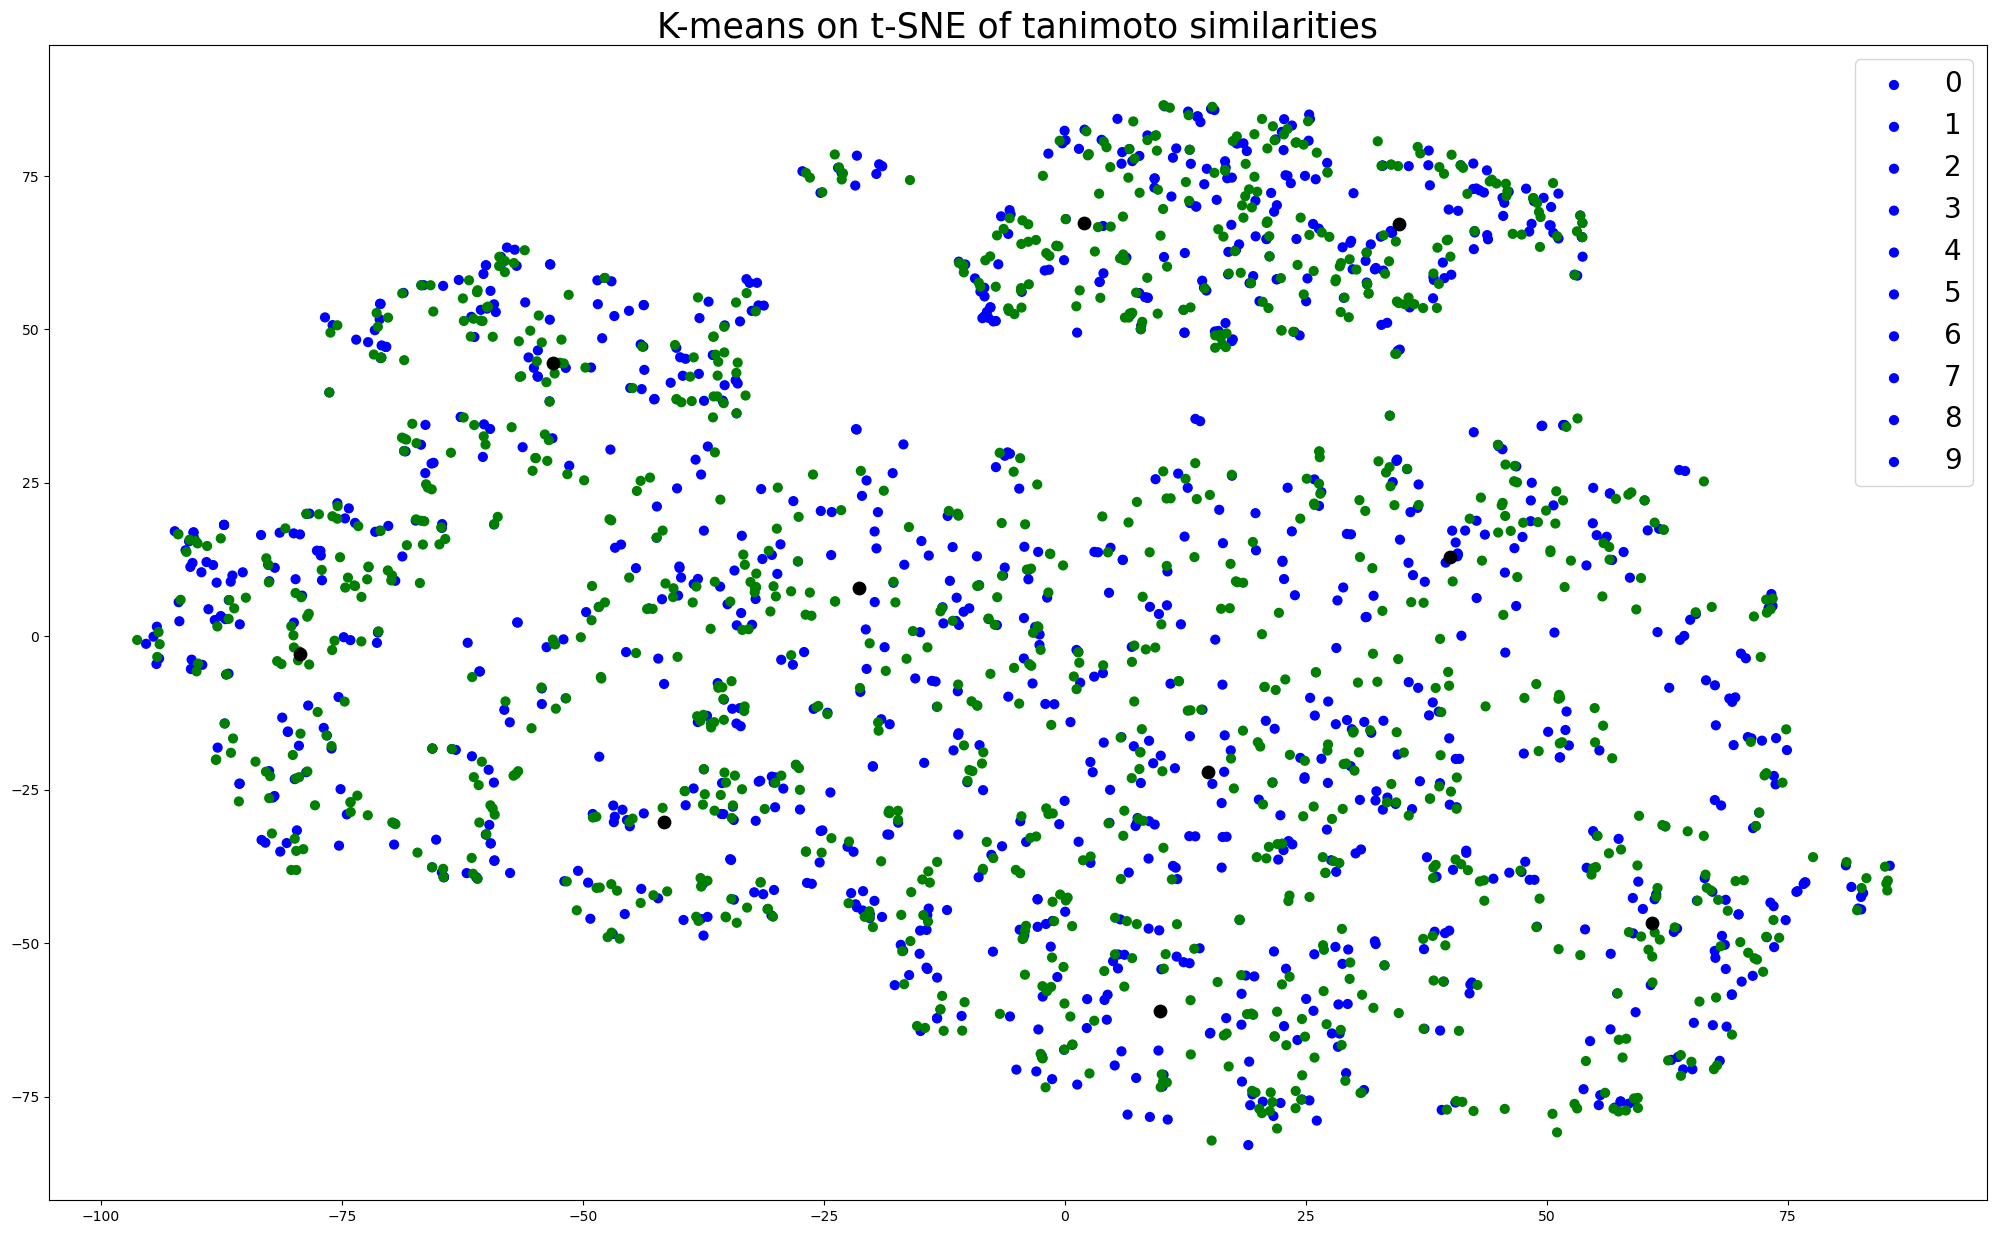

In [229]:
# Define o mapeamento de cores personalizado
color_mapping = {'test': 'blue', 'validation': 'green', 'train': 'none'}

plt.subplots(1, figsize=(25, 15))
for i in u_labels:
    subset_colors = [color_mapping[x] for x in set_df.loc[set_df['kmeans'] == i, 'subset']]
    plt.scatter(tsne_similarities[kmeans.labels_ == i, 0], tsne_similarities[kmeans.labels_ == i, 1],
                label=i, s=40, c=subset_colors)
plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color='k')
plt.legend(prop={'size': 20})
plt.title("K-means on t-SNE of tanimoto similarities", fontsize=25)
plt.show()

### Final da primeira parte

Uma vez que esta análise seria muito extensa para apenas um notebook, decidimos fazer a divisão das partes em dois notebooks distintos. 

A segunda parte, para além de conter ainda esta análise dos fingerprints (que serivirá de transição), irá conter ainda a análise preditiva da mutagenicidade, testanto diferentes fingerprints enquanto features, bem como os vários descritores moleculares.

### Bibliografia
</p>
<div style="text-align: justify">
1. McCarrSeal, A., Passi, A., Jaleel, U. A., Open Source Drug Discovery Consortium info@ osdd. net, & Wild, D. J. (2012). In-silico predictive mutagenicity model generation using supervised learning approaches. Journal of cheminformatics, 4, 1-11.en, P., Springer, C., & Whitehead, L. (2011). An investigation into pharmaceutically relevant mutagenicity data and the influence on Ames predictive potential. Journal of cheminformatics, 3(1), 1-20.</div>
</p>
<div style="text-align: justify">
2. Seal, A., Passi, A., Jaleel, U. A., Open Source Drug Discovery Consortium info@ osdd. net, & Wild, D. J. (2012). In-silico predictive mutagenicity model generation using supervised learning approaches. Journal of cheminformatics, 4, 1-11.</div>
</p>
<div style="text-align: justify">
3. Webb, S. J., Hanser, T., Howlin, B., Krause, P., & Vessey, J. D. (2014). Feature combination networks for the interpretation of statistical machine learning models: application to Ames mutagenicity. Journal of cheminformatics, 6(1), 1-21.</div>
</p>
<div style="text-align: justify">
4. Zhang, Q. Y., & Aires-de-Sousa, J. (2007). Random forest prediction of mutagenicity from empirical physicochemical descriptors. Journal of chemical information and modeling, 47(1), 1-8. </div>
</p>
<div style="text-align: justify">  
5. Xu, C., Cheng, F., Chen, L., Du, Z., Li, W., Liu, G., ... & Tang, Y. (2012). In silico prediction of chemical Ames mutagenicity. Journal of chemical information and modeling, 52(11), 2840-2847.
</div>
</p>
<div style="text-align: justify"> 
6. Chu, C. S., Simpson, J. D., O'Neill, P. M., & Berry, N. G. (2021). Machine learning–Predicting Ames mutagenicity of small molecules. Journal of Molecular Graphics and Modelling, 109, 108011.
</div>
</p>
<div style="text-align: justify"> 
7. Cerruela Garcia, G., García-Pedrajas, N., Luque Ruiz, I., & Gómez-Nieto, M. Á. (2018). An ensemble approach for in silico prediction of Ames mutagenicity. Journal of Mathematical Chemistry, 56, 2085-2098.
</div>
</p>
<div style="text-align: justify">     
8.  Kumar, R., Khan, F. U., Sharma, A., Siddiqui, M. H., Aziz, I. B., Kamal, M. A., ... & Uddin, M. S. (2021). A deep neural network–based approach for prediction of mutagenicity of compounds. Environmental Science and Pollution Research, 28(34), 47641-47650.
</div>
</p>
<div style="text-align: justify">  
9. Shi, T., Yang, Y., Huang, S., Chen, L., Kuang, Z., Heng, Y., & Mei, H. (2019). Molecular image-based convolutional neural network for the prediction of ADMET properties. Chemometrics and Intelligent Laboratory Systems, 194, 103853.
</div>
</p>
<div style="text-align: justify">      
10. Gini, G., Zanoli, F., Gamba, A., Raitano, G., & Benfenati, E. (2019). Could deep learning in neural networks improve the QSAR models?. SAR and QSAR in Environmental Research, 30(9), 617-642.
</div>
</p>
<div style="text-align: justify">   
11. Hung, C., & Gini, G. (2021). QSAR modeling without descriptors using graph convolutional neural networks: the case of mutagenicity prediction. Molecular diversity, 25(3), 1283-1299.